In [1]:
# %connect_info
%matplotlib inline
!git pull
import time
import datetime
import tqdm
import seaborn as sns
sns.set_theme()
import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from notebooks.lambda_imports import *
start_notebook=time.time()

Already up to date.
PROJECT_PATH=E:\javif\Coding\Python\market_making_fw\python_lambda
LAMBDA_OUTPUT_PATH=X:\output_models
LAMBDA_TEMP_PATH=E:\javif\Coding\Python\market_making_fw\java\temp
BACKTEST_JAR_PATH(LAMBDA_JAR_PATH)=E:\javif\Coding\Python\market_making_fw\java\executables\Backtest\target\Backtest.jar
log_path(LAMBDA_LOGS_PATH)=X:\logs\240114
LAMBDA_DATA_PATH=X:\


In [2]:
import torch
torch.cuda.is_available()

True

# Index:
* [Configuration](#configuration)
* [Algorithms](#algorithms)
* [Parameter tuning](#parameter_tuning)
* [Training](#training)
* [Testing](#testing)
* [Results](#results)
  * [Ratios](#ratios)
    * [Sharpe](#sharpe)
* [Email](#email)

## Configuration<a class="anchor" id="configuration"></a>

In [3]:
NAME = "AlphaAvellanedaStoikov"

PARAMETER_TUNING=False
TRAINING=False
TESTING=True
# from trading_algorithms.reinforcement_learning.core.baselines3.core_baselines3 import CoreBaselines3
# CoreBaselines3.USE_JAX = False

DEBUG=False
instrument_pk='btcusdt_kraken'


days_backtest = [
    datetime.datetime(2023,11,10),
#     datetime.datetime(2023,11,11),
#     datetime.datetime(2023,11,12),
    datetime.datetime(2023,11,13),
    datetime.datetime(2023,11,14),
    datetime.datetime(2023,11,15),
    datetime.datetime(2023,11,16),   
    datetime.datetime(2023,11,17),   
#     datetime.datetime(2023,11,18),   
#     datetime.datetime(2023,11,19),  
    datetime.datetime(2023,11,20),
    datetime.datetime(2023,11,21),
    datetime.datetime(2023,11,22),
    datetime.datetime(2023,11,23),
    datetime.datetime(2023,11,24),
#     datetime.datetime(2023,11,25),
#     datetime.datetime(2023,11,26),
    datetime.datetime(2023,11,27),
    datetime.datetime(2023,11,28),
    datetime.datetime(2023,11,29),
    datetime.datetime(2023,11,30),
]

day_train=days_backtest[0]

days_backtest.remove(day_train)


QUANTITY=0.0001
FIRST_HOUR=7.0
LAST_HOUR=19.0
Algorithm.DELAY_MS=0#65 ms of slippage
Algorithm.FEES_COMMISSIONS_INCLUDED=False
Algorithm.MULTITHREAD_CONFIGURATION = MultiThreadConfiguration.singlethread#singlethread

seed_number=int(28220)
np.random.seed(seed_number)
import random
random.seed(seed_number)

if DEBUG:
    print("DEBUG")
    NAME+="_debug"
    FIRST_HOUR=13
    LAST_HOUR=17

## Algorithms<a class="anchor" id="algorithms"></a>

In [4]:
algorithms_list = []
algorithm_info_to_algo={}
algorithms_parameter_tuning_max = {}#algorithm to parameters
algorithms_parameter_tuning_min = {}#algorithm to parameters
algorithms_parameter_tuning_link={}#parameter tuning algo to is linked results
algorithms_train_list = []
algorithms_benchmark = []

In [5]:
# ConstantSpread
parameters_default = {
    ConstantSpreadParameters.quantity_limit: QUANTITY*10,
    AlgorithmParameters.quantity: QUANTITY,
    AlgorithmParameters.first_hour: FIRST_HOUR,
    AlgorithmParameters.last_hour: LAST_HOUR,
    AlgorithmParameters.seed : seed_number,
    ConstantSpreadParameters.level:(1)
}
algorithm_info_constant='benchmark'
constant_spread_10 = ConstantSpread(algorithm_info=algorithm_info_constant,parameters=parameters_default)
print(f'{constant_spread_10.algorithm_info} with params {constant_spread_10.parameters}')

algorithm_info_to_algo[constant_spread_10.algorithm_info] = constant_spread_10
algorithms_list.append(constant_spread_10)
algorithms_benchmark.append(constant_spread_10)

ConstantSpread_benchmark with params {'quantityLimit': 0.001, 'quantity': 0.0001, 'firstHour': 7.0, 'lastHour': 19.0, 'seed': 28220, 'level': 1, 'ui': 0, 'skewLevel': 0}


In [6]:
# LinearConstantSpread
parameters_default = {
    LinearConstantSpreadParameters.quantity_limit: QUANTITY*10,
    AlgorithmParameters.quantity: QUANTITY,
    AlgorithmParameters.first_hour: FIRST_HOUR,
    AlgorithmParameters.last_hour: LAST_HOUR,
    AlgorithmParameters.seed : seed_number,
    LinearConstantSpreadParameters.level:1
}

algorithm_info_linear_constant='benchmark'
linear_constant_spread = LinearConstantSpread(algorithm_info=algorithm_info_linear_constant,parameters=parameters_default)
print(f'{linear_constant_spread.algorithm_info} with params {linear_constant_spread.parameters}')

algorithm_info_to_algo[linear_constant_spread.algorithm_info] = linear_constant_spread
algorithms_list.append(linear_constant_spread)
algorithms_benchmark.append(linear_constant_spread)

LinearConstantSpread_benchmark with params {'quantityLimit': 0.001, 'quantity': 0.0001, 'firstHour': 7.0, 'lastHour': 19.0, 'seed': 28220, 'level': 1}


In [7]:
# AvellanedaStoikov
avellaneda_stoikov_parameters_default = {
    # Avellaneda default
    AvellanedaStoikovParameters.risk_aversion: 0.9,
    AvellanedaStoikovParameters.midprice_period_seconds: 60,
    AvellanedaStoikovParameters.seconds_change_k:60,
    AlgorithmParameters.quantity: QUANTITY,
    AlgorithmParameters.first_hour: FIRST_HOUR,
    AlgorithmParameters.last_hour: LAST_HOUR,
    AlgorithmParameters.seed : seed_number,
    AvellanedaStoikovParameters.k_calculation: KCalculationEnum.Pct,
    AvellanedaStoikovParameters.spread_calculation:SpreadCalculationEnum.Avellaneda,
    AvellanedaStoikovParameters.calculate_Tt:0
}


algorithm_info_as='benchmark'
avellaneda_stoikov = AvellanedaStoikov(algorithm_info=algorithm_info_as,parameters=avellaneda_stoikov_parameters_default)
print(f'{avellaneda_stoikov.algorithm_info} with params {avellaneda_stoikov.parameters}')

algorithms_parameter_tuning_min[avellaneda_stoikov] = {AvellanedaStoikovParameters.risk_aversion:0.0001,AvellanedaStoikovParameters.midprice_period_window:5,AvellanedaStoikovParameters.midprice_period_seconds:3, AvellanedaStoikovParameters.seconds_change_k:60,}
algorithms_parameter_tuning_max[avellaneda_stoikov] =  {AvellanedaStoikovParameters.risk_aversion:0.9, AvellanedaStoikovParameters.midprice_period_window:120,AvellanedaStoikovParameters.midprice_period_seconds:60, AvellanedaStoikovParameters.seconds_change_k:60*10}
algorithm_info_to_algo[avellaneda_stoikov.algorithm_info] = avellaneda_stoikov
algorithms_list.append(avellaneda_stoikov)
algorithms_benchmark.append(avellaneda_stoikov)

AvellanedaStoikov_benchmark with params {'riskAversion': 0.9, 'midpricePeriodSeconds': 60, 'changeKPeriodSeconds': 60, 'quantity': 0.0001, 'firstHour': 7.0, 'lastHour': 19.0, 'seed': 28220, 'kCalculation': 'Pct', 'spreadCalculation': 'Avellaneda', 'calculateTt': 0, 'skew': 0, 'midpricePeriodWindow': 15, 'ui': 0, 'kDefault': -1, 'aDefault': -1, 'sigmaDefault': -1, 'positionMultiplier': 1.0, 'spreadMultiplier': 1.0}


In [8]:
## rl configuration
rl_step_seconds=5
rl_reward_function = ScoreEnum.asymmetric_dampened_pnl
rl_port= 666
delta_rl_port = 3

rl_training_stats=False
rl_max_batch_size=1_000_000
rl_batch_size=193
rl_epoch=10
rl_exploration_prob=0.1
rl_learning_rate = 0.002369
rl_discount_factor=0.001
rl_learning_rate_decrease = False
vf_coef=0.5701#0.5
ent_coef=0.0539#0.0


stop_action_on_filled= False
horizon_ticks_private_state=1
horizon_ticks_market_state=15
horizon_candles_state=5
horizon_min_ms_tick=1
most_significant_state_columns=[]
training_predict_iteration_period = IterationsPeriodTime.TWO_HOURS
training_target_iteration_period = IterationsPeriodTime.FOUR_HOURS

device='cuda'#auto,cpu or cuda

In [9]:
#AlphaAS parameters
parameters_default_as = {
    RlAlgorithmParameters.training_stats : rl_training_stats,
    AlgorithmParameters.quantity: QUANTITY,
    AlgorithmParameters.first_hour: FIRST_HOUR,
    AlgorithmParameters.last_hour: LAST_HOUR,
    AlgorithmParameters.seed : seed_number,
    
    # ACTIONS -> will define later
#     AlphaAvellanedaAlgorithmParameters.skew_action: [],
#     AlphaAvellanedaAlgorithmParameters.risk_aversion_action: [],
#     AlphaAvellanedaAlgorithmParameters.midprice_period_window_action: [],
#     AlphaAvellanedaAlgorithmParameters.change_k_period_seconds_action: [],

    #STATES
    RlAlgorithmParameters.normalize_clip_obs: 40, 
    RlAlgorithmParameters.horizon_ticks_private_state: horizon_ticks_private_state,
    RlAlgorithmParameters.horizon_ticks_market_state: horizon_ticks_market_state,
    RlAlgorithmParameters.horizon_candles_state: horizon_candles_state,
    RlAlgorithmParameters.horizon_min_ms_tick: horizon_min_ms_tick,
    RlAlgorithmParameters.stop_action_on_filled: stop_action_on_filled,

    RlAlgorithmParameters.state_filter: most_significant_state_columns,
    
    #REWARD
    RlAlgorithmParameters.score: rl_reward_function,
    RlAlgorithmParameters.step_seconds: rl_step_seconds,
    
    #LEARNING CONFIG
#     RlAlgorithmParameters.rl_port: rl_port,
#     RlAlgorithmParameters.action_type: rl_action_type,
#     RlAlgorithmParameters.model: rl_model,
    
    RlAlgorithmParameters.exploration_probability: rl_exploration_prob,  # probability of explore=> random action
    RlAlgorithmParameters.discount_factor: rl_discount_factor,  # next state prediction reward discount new values reward multiplier
    RlAlgorithmParameters.learning_rate_nn: rl_learning_rate,#on nn
    RlAlgorithmParameters.learning_rate_decrease: rl_learning_rate_decrease,
    #DQN
    RlAlgorithmParameters.max_batch_size: rl_max_batch_size,
    RlAlgorithmParameters.batch_size: rl_batch_size,
    RlAlgorithmParameters.training_predict_iteration_period: training_predict_iteration_period,  # train only at the end,offline
    RlAlgorithmParameters.training_target_iteration_period: training_target_iteration_period,  # train at the end,offline
    RlAlgorithmParameters.epoch: rl_epoch,
    RlAlgorithmParameters.device:device,
    RlAlgorithmParameters.vf_coef: vf_coef,
    RlAlgorithmParameters.ent_coef: ent_coef,
}

#AlphaCS parameters
parameters_default_cs = {
    RlAlgorithmParameters.training_stats : rl_training_stats,
    AlgorithmParameters.quantity: QUANTITY,
    AlgorithmParameters.first_hour: FIRST_HOUR,
    AlgorithmParameters.last_hour: LAST_HOUR,
    AlgorithmParameters.seed : seed_number,
    
    # ACTIONS
    AlphaConstantSpreadParameters.level_action:[0,1,2],
    AlphaConstantSpreadParameters.skew_level_action:[-2,-1,0,1,2],

    #STATES
    RlAlgorithmParameters.normalize_clip_obs: 40, 
    RlAlgorithmParameters.horizon_ticks_private_state: horizon_ticks_private_state,
    RlAlgorithmParameters.horizon_ticks_market_state: horizon_ticks_market_state,
    RlAlgorithmParameters.horizon_candles_state: horizon_candles_state,
    RlAlgorithmParameters.horizon_min_ms_tick: horizon_min_ms_tick,
    RlAlgorithmParameters.stop_action_on_filled: stop_action_on_filled,

    RlAlgorithmParameters.state_filter: most_significant_state_columns,
    
    #REWARD
    RlAlgorithmParameters.score: rl_reward_function,
    RlAlgorithmParameters.step_seconds: rl_step_seconds,
    
    #LEARNING CONFIG
#     RlAlgorithmParameters.rl_port: rl_port,
#     RlAlgorithmParameters.action_type: rl_action_type,
#     RlAlgorithmParameters.model: rl_model,
    
    RlAlgorithmParameters.exploration_probability: rl_exploration_prob,  # probability of explore=> random action
    RlAlgorithmParameters.discount_factor: rl_discount_factor,  # next state prediction reward discount new values reward multiplier
    RlAlgorithmParameters.learning_rate_nn: rl_learning_rate,#on nn
    RlAlgorithmParameters.learning_rate_decrease: rl_learning_rate_decrease,
    #DQN
    RlAlgorithmParameters.max_batch_size: rl_max_batch_size,
    RlAlgorithmParameters.batch_size: rl_batch_size,
    RlAlgorithmParameters.training_predict_iteration_period: training_predict_iteration_period,  # train only at the end,offline
    RlAlgorithmParameters.training_target_iteration_period: training_target_iteration_period,  # train at the end,offline
    RlAlgorithmParameters.epoch: rl_epoch,
    RlAlgorithmParameters.device: device,
    RlAlgorithmParameters.vf_coef: vf_coef,
    RlAlgorithmParameters.ent_coef: ent_coef,
}

In [10]:
# # # AlphaAvellanedaStoikov DQN
rl_action_type= ReinforcementLearningActionType.discrete
rl_model = BaseModelType.DQN

parameters_default = copy.copy(parameters_default_as)
parameters_default[RlAlgorithmParameters.rl_port] = rl_port
parameters_default[RlAlgorithmParameters.action_type] = rl_action_type
parameters_default[RlAlgorithmParameters.model] = rl_model


rl_port+=delta_rl_port

algorithm_info_alpha_as=rf'{rl_model}_{rl_action_type}'
alpha_avellaneda_stoikov = AlphaAvellanedaStoikov(algorithm_info=algorithm_info_alpha_as,parameters=parameters_default)
alpha_avellaneda_stoikov.set_parameters(avellaneda_stoikov_parameters_default)
print(f'{alpha_avellaneda_stoikov.algorithm_info} with params {alpha_avellaneda_stoikov.parameters}')

algorithm_info_to_algo[alpha_avellaneda_stoikov.algorithm_info] = alpha_avellaneda_stoikov
algorithms_train_list.append(alpha_avellaneda_stoikov)
algorithms_list.append(alpha_avellaneda_stoikov)


list_linked = algorithms_parameter_tuning_link.get(avellaneda_stoikov,[])
list_linked.append(alpha_avellaneda_stoikov)
algorithms_parameter_tuning_link[avellaneda_stoikov] = list_linked

CoreRlAlgorithm.create_core: core_type = baselines3
CoreRlAlgorithm.create_core: core_type = baselines3
states(PYTHON) [173] : inventory_0,unrealized_0,realized_0,minutesToFinish,market_bid_price_14,market_bid_price_13,market_bid_price_12,market_bid_price_11,market_bid_price_10,market_bid_price_9,market_bid_price_8,market_bid_price_7,market_bid_price_6,market_bid_price_5,market_bid_price_4,market_bid_price_3,market_bid_price_2,market_bid_price_1,market_bid_price_0,market_ask_price_14,market_ask_price_13,market_ask_price_12,market_ask_price_11,market_ask_price_10,market_ask_price_9,market_ask_price_8,market_ask_price_7,market_ask_price_6,market_ask_price_5,market_ask_price_4,market_ask_price_3,market_ask_price_2,market_ask_price_1,market_ask_price_0,market_bid_qty_14,market_bid_qty_13,market_bid_qty_12,market_bid_qty_11,market_bid_qty_10,market_bid_qty_9,market_bid_qty_8,market_bid_qty_7,market_bid_qty_6,market_bid_qty_5,market_bid_qty_4,market_bid_qty_3,market_bid_qty_2,market_bid_qty_

In [11]:
# # # AlphaAvellanedaStoikov SAC
rl_action_type= ReinforcementLearningActionType.continuous
rl_model = BaseModelType.SAC

parameters_default = copy.copy(parameters_default_as)
parameters_default[RlAlgorithmParameters.rl_port] = rl_port
parameters_default[RlAlgorithmParameters.action_type] = rl_action_type
parameters_default[RlAlgorithmParameters.model] = rl_model

rl_port+=delta_rl_port

algorithm_info_alpha_as=rf'{rl_model}_{rl_action_type}'
alpha_avellaneda_stoikov = AlphaAvellanedaStoikov(algorithm_info=algorithm_info_alpha_as,parameters=parameters_default)
alpha_avellaneda_stoikov.set_parameters(avellaneda_stoikov_parameters_default)
print(f'{alpha_avellaneda_stoikov.algorithm_info} with params {alpha_avellaneda_stoikov.parameters}')

algorithm_info_to_algo[alpha_avellaneda_stoikov.algorithm_info] = alpha_avellaneda_stoikov
algorithms_train_list.append(alpha_avellaneda_stoikov)
algorithms_list.append(alpha_avellaneda_stoikov)


list_linked = algorithms_parameter_tuning_link.get(avellaneda_stoikov,[])
list_linked.append(alpha_avellaneda_stoikov)
algorithms_parameter_tuning_link[avellaneda_stoikov] = list_linked

CoreRlAlgorithm.create_core: core_type = baselines3
continuous action (10, 10) with index 0 with low_val==high_val 10 10 -> added to ContinuousActionAdaptor
continuous action (-1, -1) with index 3 with low_val==high_val -1 -1 -> added to ContinuousActionAdaptor
continuous action (-1, -1) with index 4 with low_val==high_val -1 -1 -> added to ContinuousActionAdaptor
continuous action (60, 60) with index 5 with low_val==high_val 60 60 -> added to ContinuousActionAdaptor
CoreRlAlgorithm.create_core: core_type = baselines3
states(PYTHON) [173] : inventory_0,unrealized_0,realized_0,minutesToFinish,market_bid_price_14,market_bid_price_13,market_bid_price_12,market_bid_price_11,market_bid_price_10,market_bid_price_9,market_bid_price_8,market_bid_price_7,market_bid_price_6,market_bid_price_5,market_bid_price_4,market_bid_price_3,market_bid_price_2,market_bid_price_1,market_bid_price_0,market_ask_price_14,market_ask_price_13,market_ask_price_12,market_ask_price_11,market_ask_price_10,market_ask_

In [12]:
# AlphaAvellanedaStoikov PPO contin
rl_action_type= ReinforcementLearningActionType.continuous
rl_model = BaseModelType.PPO

parameters_default = copy.copy(parameters_default_as)
parameters_default[RlAlgorithmParameters.rl_port] = rl_port
parameters_default[RlAlgorithmParameters.action_type] = rl_action_type
parameters_default[RlAlgorithmParameters.model] = rl_model

rl_port+=delta_rl_port

algorithm_info_alpha_as=rf'{rl_model}_{rl_action_type}'
alpha_avellaneda_stoikov = AlphaAvellanedaStoikov(algorithm_info=algorithm_info_alpha_as,parameters=parameters_default)
alpha_avellaneda_stoikov.set_parameters(avellaneda_stoikov_parameters_default)
print(f'{alpha_avellaneda_stoikov.algorithm_info} with params {alpha_avellaneda_stoikov.parameters}')

algorithm_info_to_algo[alpha_avellaneda_stoikov.algorithm_info] = alpha_avellaneda_stoikov
algorithms_train_list.append(alpha_avellaneda_stoikov)
algorithms_list.append(alpha_avellaneda_stoikov)


list_linked = algorithms_parameter_tuning_link.get(avellaneda_stoikov,[])
list_linked.append(alpha_avellaneda_stoikov)
algorithms_parameter_tuning_link[avellaneda_stoikov] = list_linked

CoreRlAlgorithm.create_core: core_type = baselines3
continuous action (10, 10) with index 0 with low_val==high_val 10 10 -> added to ContinuousActionAdaptor
continuous action (-1, -1) with index 3 with low_val==high_val -1 -1 -> added to ContinuousActionAdaptor
continuous action (-1, -1) with index 4 with low_val==high_val -1 -1 -> added to ContinuousActionAdaptor
continuous action (60, 60) with index 5 with low_val==high_val 60 60 -> added to ContinuousActionAdaptor
CoreRlAlgorithm.create_core: core_type = baselines3
states(PYTHON) [173] : inventory_0,unrealized_0,realized_0,minutesToFinish,market_bid_price_14,market_bid_price_13,market_bid_price_12,market_bid_price_11,market_bid_price_10,market_bid_price_9,market_bid_price_8,market_bid_price_7,market_bid_price_6,market_bid_price_5,market_bid_price_4,market_bid_price_3,market_bid_price_2,market_bid_price_1,market_bid_price_0,market_ask_price_14,market_ask_price_13,market_ask_price_12,market_ask_price_11,market_ask_price_10,market_ask_

In [13]:
# # AlphaAvellanedaStoikov PPO discrete
# rl_action_type= ReinforcementLearningActionType.discrete
# rl_model = BaseModelType.PPO

# parameters_default = copy.copy(parameters_default_as)
# parameters_default[RlAlgorithmParameters.rl_port] = rl_port
# parameters_default[RlAlgorithmParameters.action_type] = rl_action_type
# parameters_default[RlAlgorithmParameters.model] = rl_model

# rl_port+=delta_rl_port

# algorithm_info_alpha_as=rf'{rl_model}_{rl_action_type}'
# alpha_avellaneda_stoikov = AlphaAvellanedaStoikov(algorithm_info=algorithm_info_alpha_as,parameters=parameters_default)
# alpha_avellaneda_stoikov.set_parameters(avellaneda_stoikov_parameters_default)
# print(f'{alpha_avellaneda_stoikov.algorithm_info} with params {alpha_avellaneda_stoikov.parameters}')

# algorithm_info_to_algo[alpha_avellaneda_stoikov.algorithm_info] = alpha_avellaneda_stoikov
# algorithms_train_list.append(alpha_avellaneda_stoikov)
# algorithms_list.append(alpha_avellaneda_stoikov)


# list_linked = algorithms_parameter_tuning_link.get(avellaneda_stoikov,[])
# list_linked.append(alpha_avellaneda_stoikov)
# algorithms_parameter_tuning_link[avellaneda_stoikov] = list_linked

In [14]:
# # AlphaConstantSpread
rl_action_type= ReinforcementLearningActionType.discrete
rl_model = BaseModelType.DQN

parameters_default = copy.copy(parameters_default_cs)
parameters_default[RlAlgorithmParameters.rl_port] = rl_port
parameters_default[RlAlgorithmParameters.action_type] = rl_action_type
parameters_default[RlAlgorithmParameters.model] = rl_model


rl_port+=delta_rl_port

algorithm_info_alpha_cs=rf'{rl_model}_{rl_action_type}'
alpha_constant_spread = AlphaConstantSpread(algorithm_info=algorithm_info_alpha_cs,parameters=parameters_default)

print(f'{alpha_constant_spread.algorithm_info} with params {alpha_constant_spread.parameters}')

algorithm_info_to_algo[alpha_constant_spread.algorithm_info] = alpha_constant_spread
algorithms_train_list.append(alpha_constant_spread)
algorithms_list.append(alpha_constant_spread)

CoreRlAlgorithm.create_core: core_type = baselines3
AlphaConstantSpread_DQN_discrete with params {'trainingStats': False, 'quantity': 0.0001, 'firstHour': 7.0, 'lastHour': 19.0, 'seed': 28220, 'levelAction': [0, 1, 2], 'skewLevelAction': [-2, -1, 0, 1, 2], 'normalize_clip_obs': 40, 'horizonTicksPrivateState': 1, 'horizonTicksMarketState': 15, 'horizonCandlesState': 5, 'horizonMinMsTick': 1, 'stopActionOnFilled': False, 'stateColumnsFilter': [], 'scoreEnum': 'asymmetric_dampened_pnl', 'stepSeconds': 5, 'epsilon': 0.1, 'gamma': 0.001, 'learningRateNN': 0.002369, 'learningRateDecrease': False, 'maxBatchSize': 1000000, 'batchSize': 193, 'trainingPredictIterationPeriod': -12, 'trainingTargetIterationPeriod': -14, 'epoch': 10, 'device': 'cuda', 'vf_coef': 0.5701, 'ent_coef': 0.0539, 'rlPort': 675, 'reinforcementLearningActionType': 'discrete', 'baseModel': 'DQN', 'minPrivateState': -1, 'maxPrivateState': -1, 'numberDecimalsPrivateState': -1, 'minMarketState': -1, 'maxMarketState': -1, 'numbe

In [15]:
# AlphaConstantSpread
rl_action_type= ReinforcementLearningActionType.discrete
rl_model = BaseModelType.PPO

parameters_default = copy.copy(parameters_default_cs)
parameters_default[RlAlgorithmParameters.rl_port] = rl_port
parameters_default[RlAlgorithmParameters.action_type] = rl_action_type
parameters_default[RlAlgorithmParameters.model] = rl_model

rl_port+=delta_rl_port

algorithm_info_alpha_cs=rf'{rl_model}_{rl_action_type}'
alpha_constant_spread = AlphaConstantSpread(algorithm_info=algorithm_info_alpha_cs,parameters=parameters_default)

print(f'{alpha_constant_spread.algorithm_info} with params {alpha_constant_spread.parameters}')

algorithm_info_to_algo[alpha_constant_spread.algorithm_info] = alpha_constant_spread
algorithms_train_list.append(alpha_constant_spread)
algorithms_list.append(alpha_constant_spread)

CoreRlAlgorithm.create_core: core_type = baselines3
AlphaConstantSpread_PPO_discrete with params {'trainingStats': False, 'quantity': 0.0001, 'firstHour': 7.0, 'lastHour': 19.0, 'seed': 28220, 'levelAction': [0, 1, 2], 'skewLevelAction': [-2, -1, 0, 1, 2], 'normalize_clip_obs': 40, 'horizonTicksPrivateState': 1, 'horizonTicksMarketState': 15, 'horizonCandlesState': 5, 'horizonMinMsTick': 1, 'stopActionOnFilled': False, 'stateColumnsFilter': [], 'scoreEnum': 'asymmetric_dampened_pnl', 'stepSeconds': 5, 'epsilon': 0.1, 'gamma': 0.001, 'learningRateNN': 0.002369, 'learningRateDecrease': False, 'maxBatchSize': 1000000, 'batchSize': 193, 'trainingPredictIterationPeriod': -12, 'trainingTargetIterationPeriod': -14, 'epoch': 10, 'device': 'cuda', 'vf_coef': 0.5701, 'ent_coef': 0.0539, 'rlPort': 678, 'reinforcementLearningActionType': 'discrete', 'baseModel': 'PPO', 'minPrivateState': -1, 'maxPrivateState': -1, 'numberDecimalsPrivateState': -1, 'minMarketState': -1, 'maxMarketState': -1, 'numbe

In [16]:
# AlphaConstantSpread
rl_action_type= ReinforcementLearningActionType.continuous
rl_model = BaseModelType.PPO

parameters_default = copy.copy(parameters_default_cs)
parameters_default[RlAlgorithmParameters.rl_port] = rl_port
parameters_default[RlAlgorithmParameters.action_type] = rl_action_type
parameters_default[RlAlgorithmParameters.model] = rl_model
rl_port+=delta_rl_port

algorithm_info_alpha_cs=rf'{rl_model}_{rl_action_type}'
alpha_constant_spread = AlphaConstantSpread(algorithm_info=algorithm_info_alpha_cs,parameters=parameters_default)

print(f'{alpha_constant_spread.algorithm_info} with params {alpha_constant_spread.parameters}')

algorithm_info_to_algo[alpha_constant_spread.algorithm_info] = alpha_constant_spread
algorithms_train_list.append(alpha_constant_spread)
algorithms_list.append(alpha_constant_spread)

CoreRlAlgorithm.create_core: core_type = baselines3
AlphaConstantSpread_PPO_continuous with params {'trainingStats': False, 'quantity': 0.0001, 'firstHour': 7.0, 'lastHour': 19.0, 'seed': 28220, 'levelAction': [0, 1, 2], 'skewLevelAction': [-2, -1, 0, 1, 2], 'normalize_clip_obs': 40, 'horizonTicksPrivateState': 1, 'horizonTicksMarketState': 15, 'horizonCandlesState': 5, 'horizonMinMsTick': 1, 'stopActionOnFilled': False, 'stateColumnsFilter': [], 'scoreEnum': 'asymmetric_dampened_pnl', 'stepSeconds': 5, 'epsilon': 0.1, 'gamma': 0.001, 'learningRateNN': 0.002369, 'learningRateDecrease': False, 'maxBatchSize': 1000000, 'batchSize': 193, 'trainingPredictIterationPeriod': -12, 'trainingTargetIterationPeriod': -14, 'epoch': 10, 'device': 'cuda', 'vf_coef': 0.5701, 'ent_coef': 0.0539, 'rlPort': 681, 'reinforcementLearningActionType': 'continuous', 'baseModel': 'PPO', 'minPrivateState': -1, 'maxPrivateState': -1, 'numberDecimalsPrivateState': -1, 'minMarketState': -1, 'maxMarketState': -1, 'n

## Parameter Tuning  <a class="anchor" id="parameter_tuning"></a>

In [17]:
output_path = rf"{LAMBDA_TEMP_PATH}/notebooks/{NAME}"

if not os.path.exists(output_path):
    os.makedirs(output_path,exist_ok=True)
        
print(output_path)
def save(name: str,object_to_persist):
    import pickle
    path_to_save = rf"{output_path}/{name}.pkl"
    with open(path_to_save, 'wb') as handle:
        pickle.dump(object_to_persist, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load(name: str):
        import pickle
        path_to_load = rf"{output_path}/{name}.pkl"
        with open(path_to_load, 'rb') as handle:
            return pickle.load(handle)
        

E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov


In [18]:
ga_configuration = GAConfiguration
ga_configuration.crossover_prob=0.7
ga_configuration.score_column = ScoreEnum.sharpe
ga_configuration.population_initial = 65
ga_configuration.population = 65
ga_configuration_generations=15
ga_configuration_simultaneous=15

if DEBUG:
    print(rf"DEBUG")
    ga_configuration.population_initial = 5
    ga_configuration.population = 5
    ga_configuration_generations=3
    ga_configuration_simultaneous=3    

In [19]:
name = "parameter_tuning"
if PARAMETER_TUNING:
    start_pt=time.time()
    best_param_dict = {}
    for algorithm in algorithms_parameter_tuning_min.keys():
        min_pt = algorithms_parameter_tuning_min[algorithm]
        max_pt = algorithms_parameter_tuning_max[algorithm]
        
        print(rf"STARTING PARAMETER TUNING {algorithm.algorithm_info} DEBUG:{DEBUG}")
        best_param_dict_temp, summary_df =algorithm.parameter_tuning(
        instrument_pk=instrument_pk,
        start_date=day_train+ datetime.timedelta(hours=int(FIRST_HOUR-2)),
        end_date=day_train+ datetime.timedelta(hours=int(LAST_HOUR+2)),
        parameters_min=min_pt,
        parameters_max=max_pt,
        generations=ga_configuration_generations,
        ga_configuration=ga_configuration,
        max_simultaneous=ga_configuration_simultaneous
        )
        best_param_dict[algorithm.algorithm_info] = best_param_dict_temp        
        print(rf"FINISHED PARAMETER TUNING {algorithm.algorithm_info} DEBUG:{DEBUG} -> {best_param_dict}")
    ## save results
    print(rf"saving parameter tuning results {name}")
    save(name,best_param_dict)
    elapsed_pt = time.time()-start_pt
    print('parameter tuning of %d algorithms finished in %.2f minutes'%(len(algorithms_train_list),elapsed_pt/60))

else:
    print(rf"loading parameter tuning results {name}")
    best_param_dict=load(name)
best_param_dict

loading parameter tuning results parameter_tuning


{'AvellanedaStoikov_benchmark': {'riskAversion': 0.29568107117641407,
  'midpricePeriodSeconds': 16.379220712399714,
  'changeKPeriodSeconds': 474.03108342076644,
  'quantity': 9.999999999999999e-05,
  'firstHour': 7.000000000000001,
  'lastHour': 19.0,
  'seed': 28220.0,
  'kCalculation': 'Pct',
  'spreadCalculation': 'Avellaneda',
  'calculateTt': 0.0,
  'skew': 0.0,
  'midpricePeriodWindow': 61.95889845938389,
  'ui': 0.0,
  'kDefault': -1.0,
  'aDefault': -1.0,
  'sigmaDefault': -1.0,
  'positionMultiplier': 1.0,
  'spreadMultiplier': 1.0}}

In [20]:
def set_best_to_algorithms():
    for algorithm_info in best_param_dict.keys():
        best_params = best_param_dict[algorithm_info]
        print(rf"set to {algorithm_info} {best_params}")  
        algorithm = algorithm_info_to_algo[algorithm_info]
        algorithm.set_parameters(best_params)

        if algorithm in algorithms_parameter_tuning_link:        
            for linked_algorithm in algorithms_parameter_tuning_link[algorithm]:
                print(rf"set to {linked_algorithm.algorithm_info} {best_params}")
                linked_algorithm.set_parameters(best_params)
            
set_best_to_algorithms()

set to AvellanedaStoikov_benchmark {'riskAversion': 0.29568107117641407, 'midpricePeriodSeconds': 16.379220712399714, 'changeKPeriodSeconds': 474.03108342076644, 'quantity': 9.999999999999999e-05, 'firstHour': 7.000000000000001, 'lastHour': 19.0, 'seed': 28220.0, 'kCalculation': 'Pct', 'spreadCalculation': 'Avellaneda', 'calculateTt': 0.0, 'skew': 0.0, 'midpricePeriodWindow': 61.95889845938389, 'ui': 0.0, 'kDefault': -1.0, 'aDefault': -1.0, 'sigmaDefault': -1.0, 'positionMultiplier': 1.0, 'spreadMultiplier': 1.0}
set to AlphaAvellanedaStoikov_DQN_discrete {'riskAversion': 0.29568107117641407, 'midpricePeriodSeconds': 16.379220712399714, 'changeKPeriodSeconds': 474.03108342076644, 'quantity': 9.999999999999999e-05, 'firstHour': 7.000000000000001, 'lastHour': 19.0, 'seed': 28220.0, 'kCalculation': 'Pct', 'spreadCalculation': 'Avellaneda', 'calculateTt': 0.0, 'skew': 0.0, 'midpricePeriodWindow': 61.95889845938389, 'ui': 0.0, 'kDefault': -1.0, 'aDefault': -1.0, 'sigmaDefault': -1.0, 'posit

In [21]:
#set actions based on best params benchmark
best_avellaneda_param_dict = best_param_dict[avellaneda_stoikov.algorithm_info]

best_risk_aversion=best_avellaneda_param_dict[AvellanedaStoikovParameters.risk_aversion]
best_midprice_window=best_avellaneda_param_dict[AvellanedaStoikovParameters.midprice_period_window]
best_k_period_seconds = best_avellaneda_param_dict[AvellanedaStoikovParameters.seconds_change_k]

skewAction= [-2,-1,0,1,2]
# skewAction = [0]
skewAction=list(set(skewAction))
skewAction.sort()

riskAversionAction=[max(min(best_risk_aversion/10,1.0),0.01),
                    max(min(best_risk_aversion/2,1.0),0.01),
                    best_risk_aversion,
                    max(min(best_risk_aversion*1.5,1.0),0.01),
                    max(min(best_risk_aversion*10,1.0),0.01)] 
riskAversionAction=list(set(riskAversionAction))
riskAversionAction.sort()


# midpriceWindowAction=[max(min(best_midprice_window/2,600.0),60.0),max(min(best_midprice_window*2,600.0),60.0),best_midprice_window]
midpriceWindowAction=[int(best_midprice_window)]
midpriceWindowAction=list(set(midpriceWindowAction))
midpriceWindowAction.sort()


# kPeriodSecondsAction=[max(min(best_k_period_seconds/2,600.0),60.0),max(min(best_k_period_seconds*2,600.0),60.0),best_k_period_seconds] 
kPeriodSecondsAction = [int(best_k_period_seconds)]
kPeriodSecondsAction=list(set(kPeriodSecondsAction))
kPeriodSecondsAction.sort()

print(f"skewAction: {skewAction} ")
print(f"riskAversionAction: {riskAversionAction} ")
print(f"midpriceWindowAction: {midpriceWindowAction} ")
print(f"kPeriodSecondsAction: {kPeriodSecondsAction} ")

parameters_alpha_as = {    
    # ACTIONS -> will define later
    AlphaAvellanedaAlgorithmParameters.skew_action: skewAction,
    AlphaAvellanedaAlgorithmParameters.risk_aversion_action: riskAversionAction,
    AlphaAvellanedaAlgorithmParameters.midprice_period_window_action: midpriceWindowAction,
    AlphaAvellanedaAlgorithmParameters.change_k_period_seconds_action: kPeriodSecondsAction,
}
      
for linked_algorithm in algorithms_parameter_tuning_link[avellaneda_stoikov]:
    print(rf"set to {linked_algorithm.algorithm_info} {parameters_alpha_as}")
    linked_algorithm.set_parameters(parameters_alpha_as)
    print(linked_algorithm.parameters)             


skewAction: [-2, -1, 0, 1, 2] 
riskAversionAction: [0.029568107117641407, 0.14784053558820703, 0.29568107117641407, 0.4435216067646211, 1.0] 
midpriceWindowAction: [61] 
kPeriodSecondsAction: [474] 
set to AlphaAvellanedaStoikov_DQN_discrete {'skewAction': [-2, -1, 0, 1, 2], 'riskAversionAction': [0.029568107117641407, 0.14784053558820703, 0.29568107117641407, 0.4435216067646211, 1.0], 'midpricePeriodWindowAction': [61], 'changeKPeriodSecondsAction': [474]}
CoreRlAlgorithm.create_core: core_type = baselines3
states(PYTHON) [173] : inventory_0,unrealized_0,realized_0,minutesToFinish,market_bid_price_14,market_bid_price_13,market_bid_price_12,market_bid_price_11,market_bid_price_10,market_bid_price_9,market_bid_price_8,market_bid_price_7,market_bid_price_6,market_bid_price_5,market_bid_price_4,market_bid_price_3,market_bid_price_2,market_bid_price_1,market_bid_price_0,market_ask_price_14,market_ask_price_13,market_ask_price_12,market_ask_price_11,market_ask_price_10,market_ask_price_9,ma

## Training <a class="anchor" id="training"></a>

In [22]:
start=time.time()
max_simultaneous = 5

rl_simultaneous_algos_train = 1#16 should be maxim by RAM
rl_iterations_train=100*rl_simultaneous_algos_train#25
rl_early_stopping_min_patience = (int)(rl_iterations_train*0.5)
rl_early_stopping_patience=3*rl_simultaneous_algos_train
rl_early_stopping_score = InfoStepKey.totalPnl

def _train_algorithm(algorithm,instrument_pk, start_date,end_date, iterations, simultaneous_algos,
                     clean_initial_experience, patience,min_iterations ,score_early_stopping,plot_training,output_dict):
    print(rf"{algorithm.algorithm_info}")
    print(rf"{algorithm.parameters}")
    output_train_list=algorithm.train(
                instrument_pk=instrument_pk,
                start_date=start_date,
                end_date=end_date,
                iterations=iterations,
                simultaneous_algos=simultaneous_algos,
                clean_initial_experience=clean_initial_experience,
                patience = patience,
                min_iterations = min_iterations,
                score_early_stopping=score_early_stopping,
                plot_training=plot_training
            )
    output_dict[algorithm] = output_train_list


import copy
    
if TRAINING:
    output_train_dict={}
    print(rf"TRAINING {len(algorithms_train_list)} algorithms patience:{rl_early_stopping_patience} min_iterations:{rl_early_stopping_min_patience}")
    kwargs_dict = {
        "instrument_pk":instrument_pk,
        "start_date":day_train+ datetime.timedelta(hours=int(FIRST_HOUR-2)),
        "end_date":day_train+ datetime.timedelta(hours=int(LAST_HOUR+2)),
        "iterations":rl_iterations_train,
        "simultaneous_algos":rl_simultaneous_algos_train,
        "clean_initial_experience":True,
        "patience" : rl_early_stopping_patience,
        "min_iterations" : rl_early_stopping_min_patience,
        "score_early_stopping":rl_early_stopping_score,
        "plot_training":True,
        "output_dict":output_train_dict
    }
    
    if max_simultaneous ==1:        
        for algorithm in algorithms_train_list:
            job_kwargs = copy.copy(kwargs_dict)
            job_kwargs["algorithm"] = algorithm
            output_train_list= _train_algorithm(**job_kwargs)

    else:
        from utils.paralellization_util import process_jobs_joblib
        jobs = []
        for algorithm in algorithms_train_list:
            job_kwargs = copy.copy(kwargs_dict)
            job_kwargs["func"] = _train_algorithm
            job_kwargs["algorithm"] = algorithm
            jobs.append(
                job_kwargs
            )
        process_jobs_joblib(jobs, num_threads=max_simultaneous)

        
    elapsed=time.time()-start
    print('train of %d iterations %d algorithms finished in %.2f minutes'%(rl_iterations_train,len(algorithms_train_list),elapsed/60))

        
else:
    print('using previous trained model')


using previous trained model


## Testing <a class="anchor" id="testing"></a>

testing 14 days


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

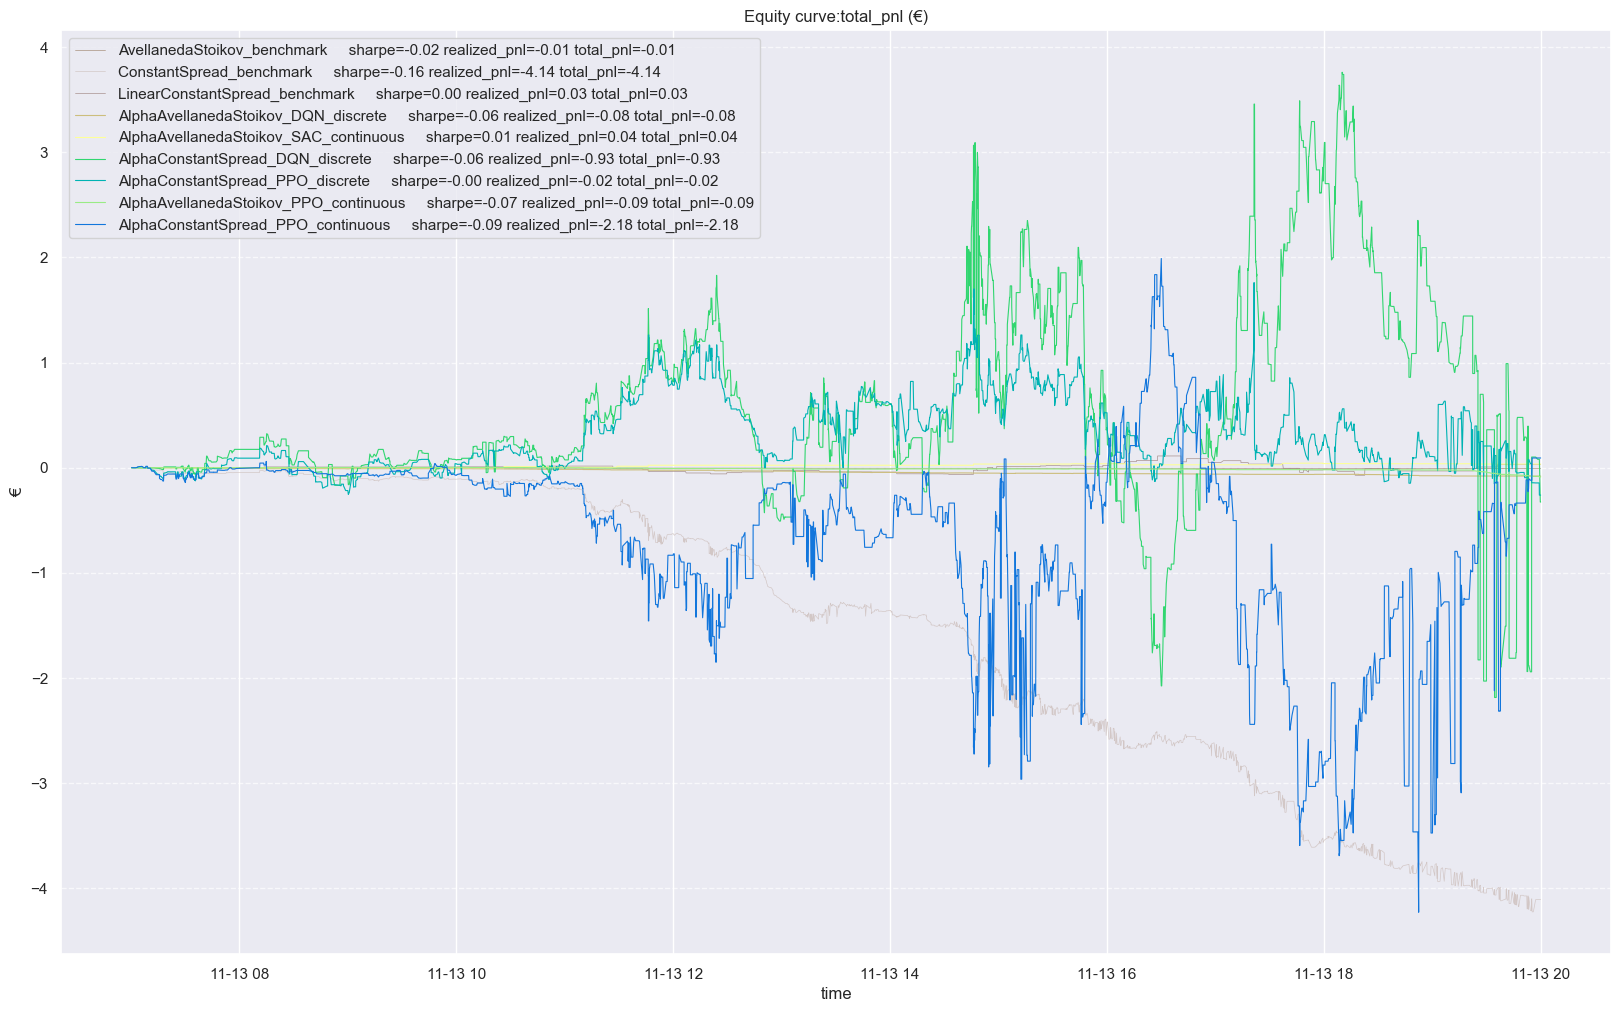

  7%|█████▋                                                                          | 1/14 [10:21<2:14:40, 621.60s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
market_making_backt

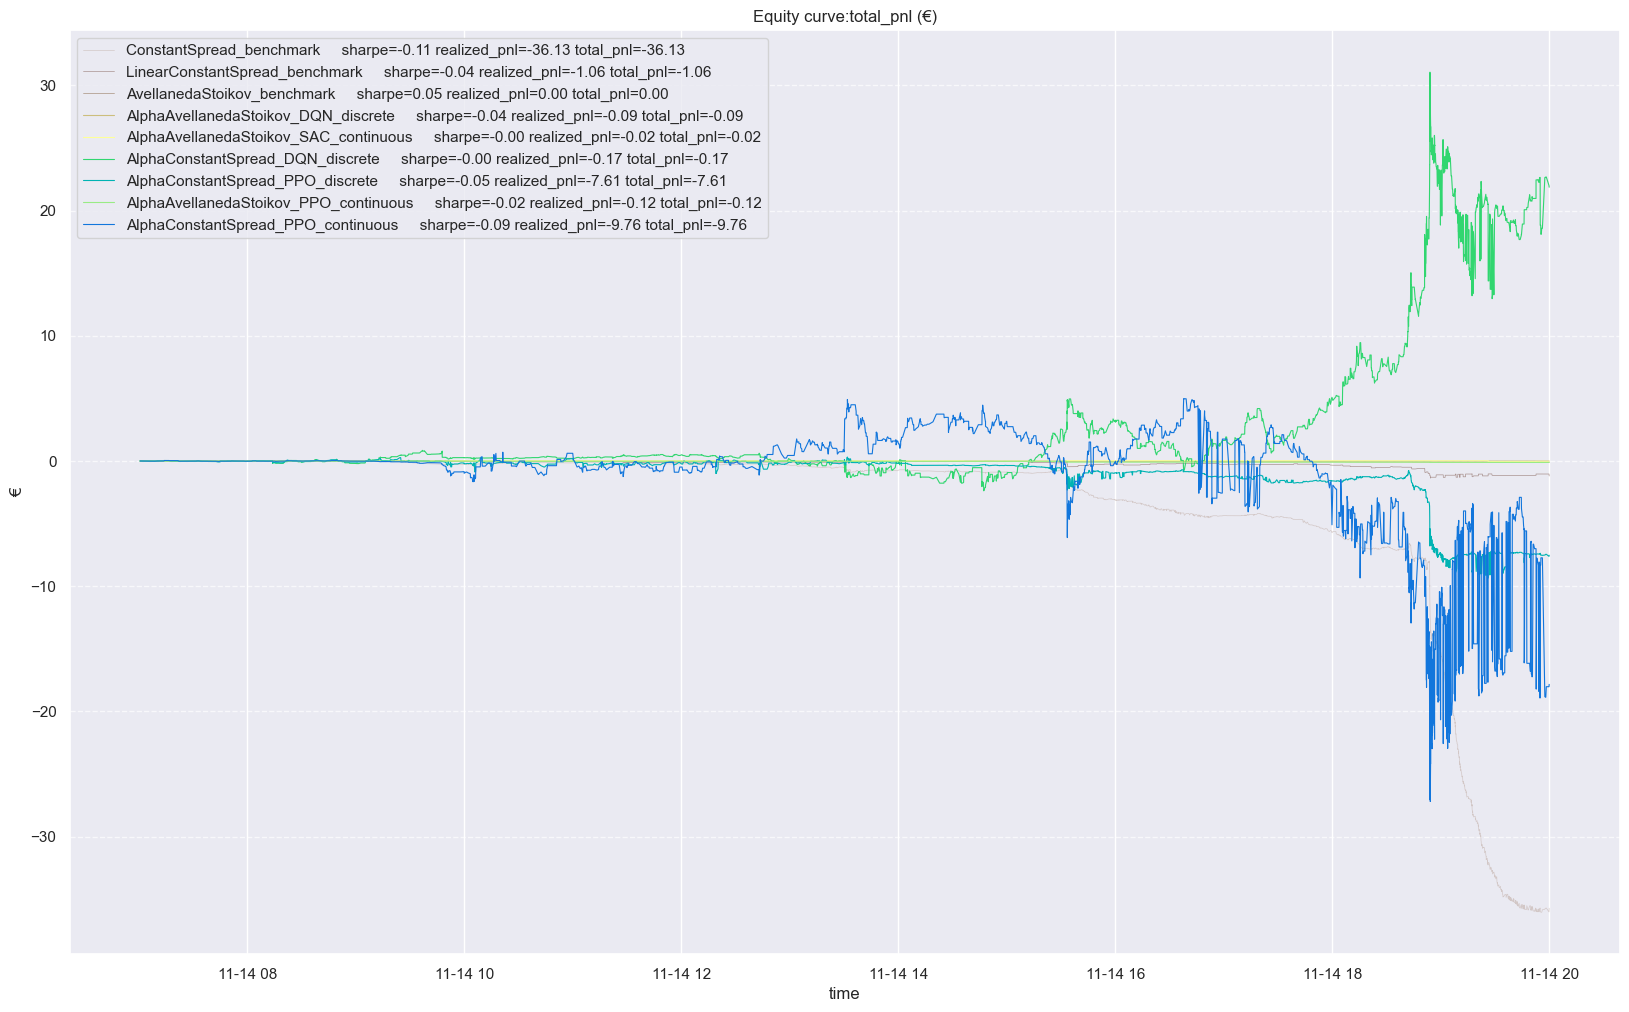

 14%|███████████▍                                                                    | 2/14 [24:09<2:28:32, 742.74s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

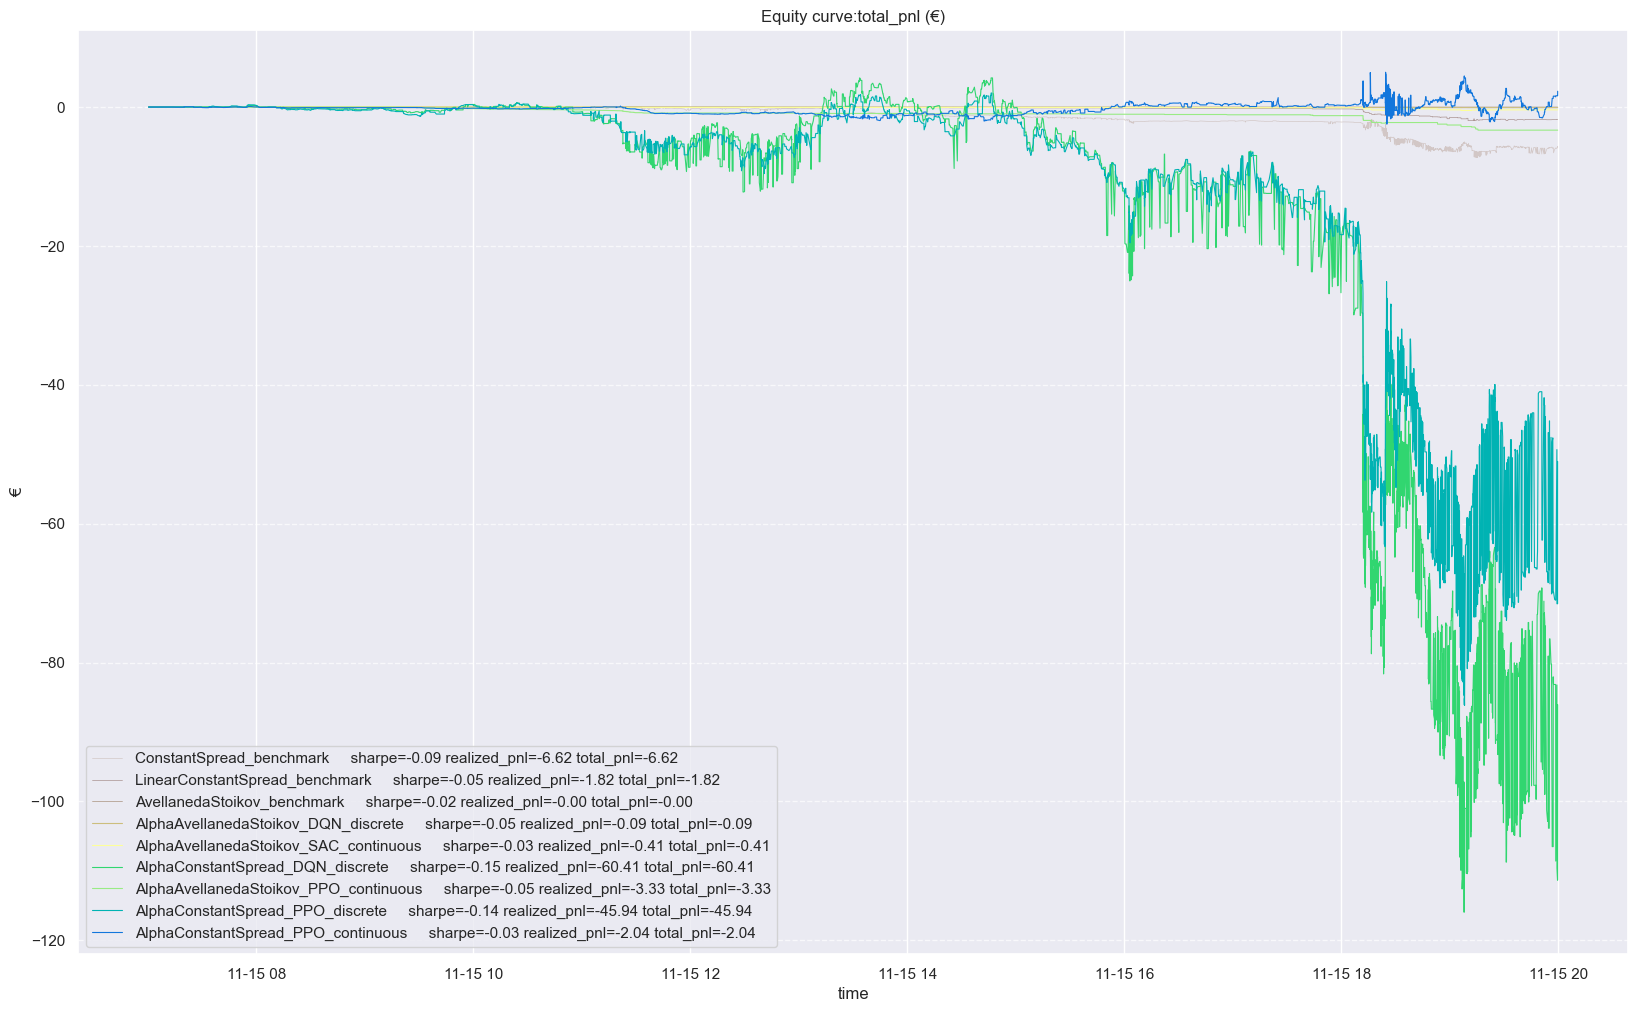

 21%|█████████████████▏                                                              | 3/14 [38:02<2:23:46, 784.22s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
market_making_backt

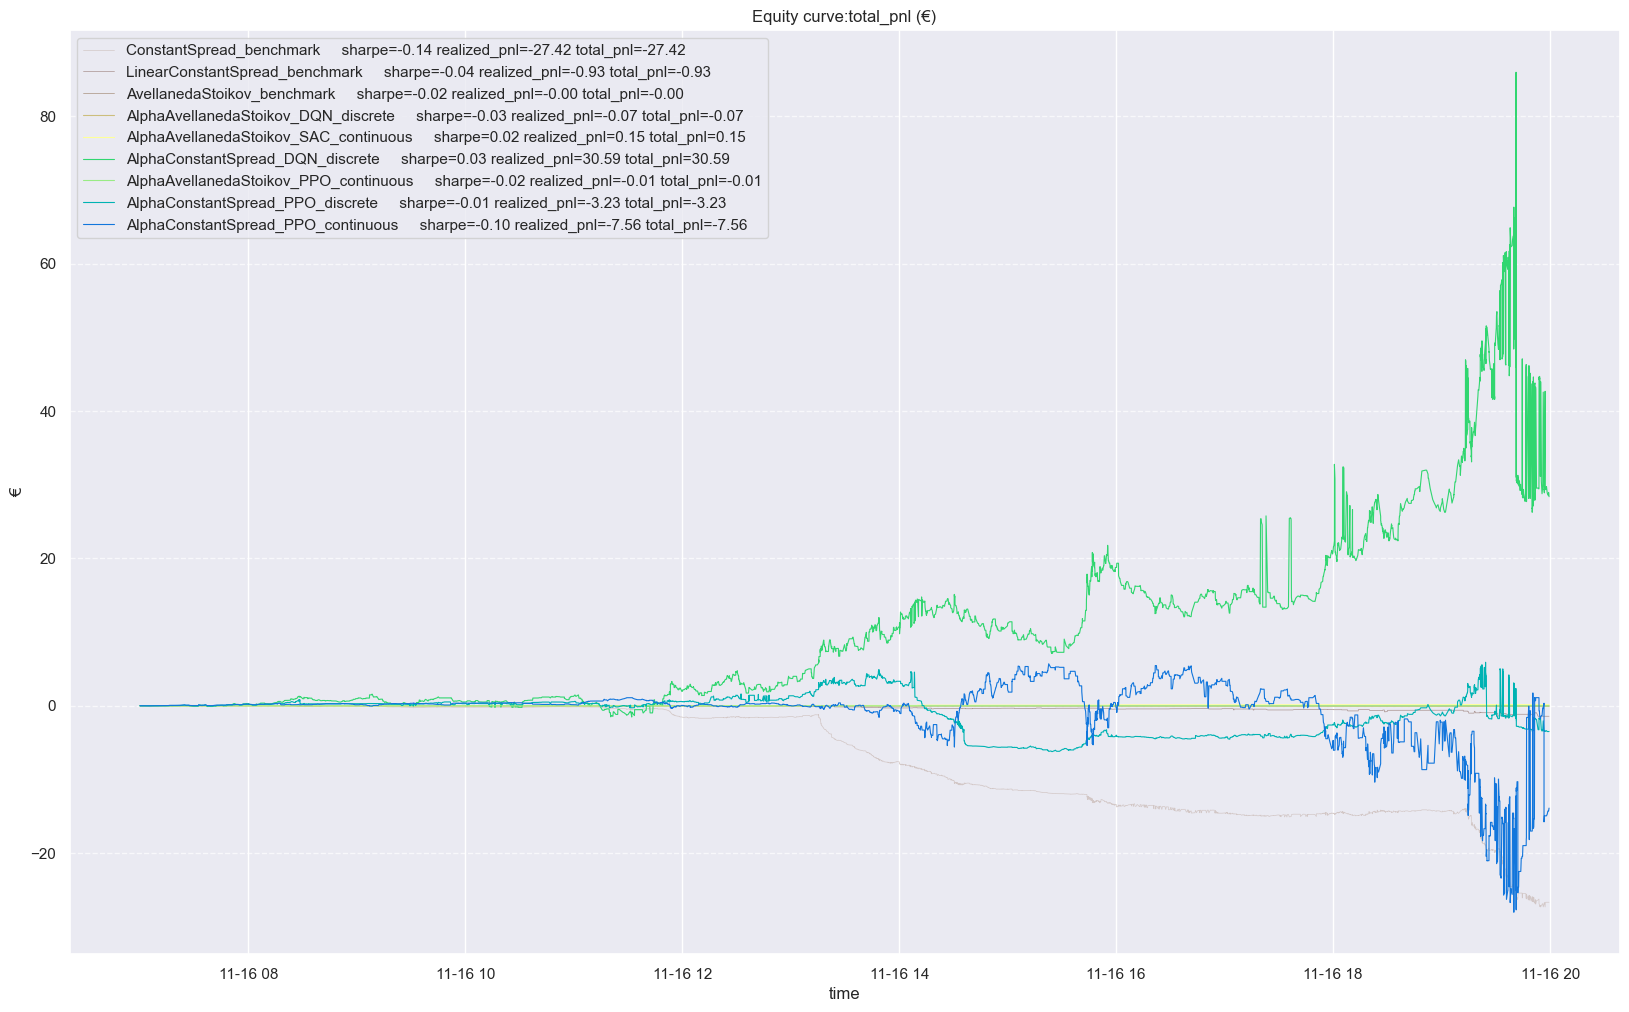

 29%|██████████████████████▊                                                         | 4/14 [52:54<2:17:45, 826.56s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

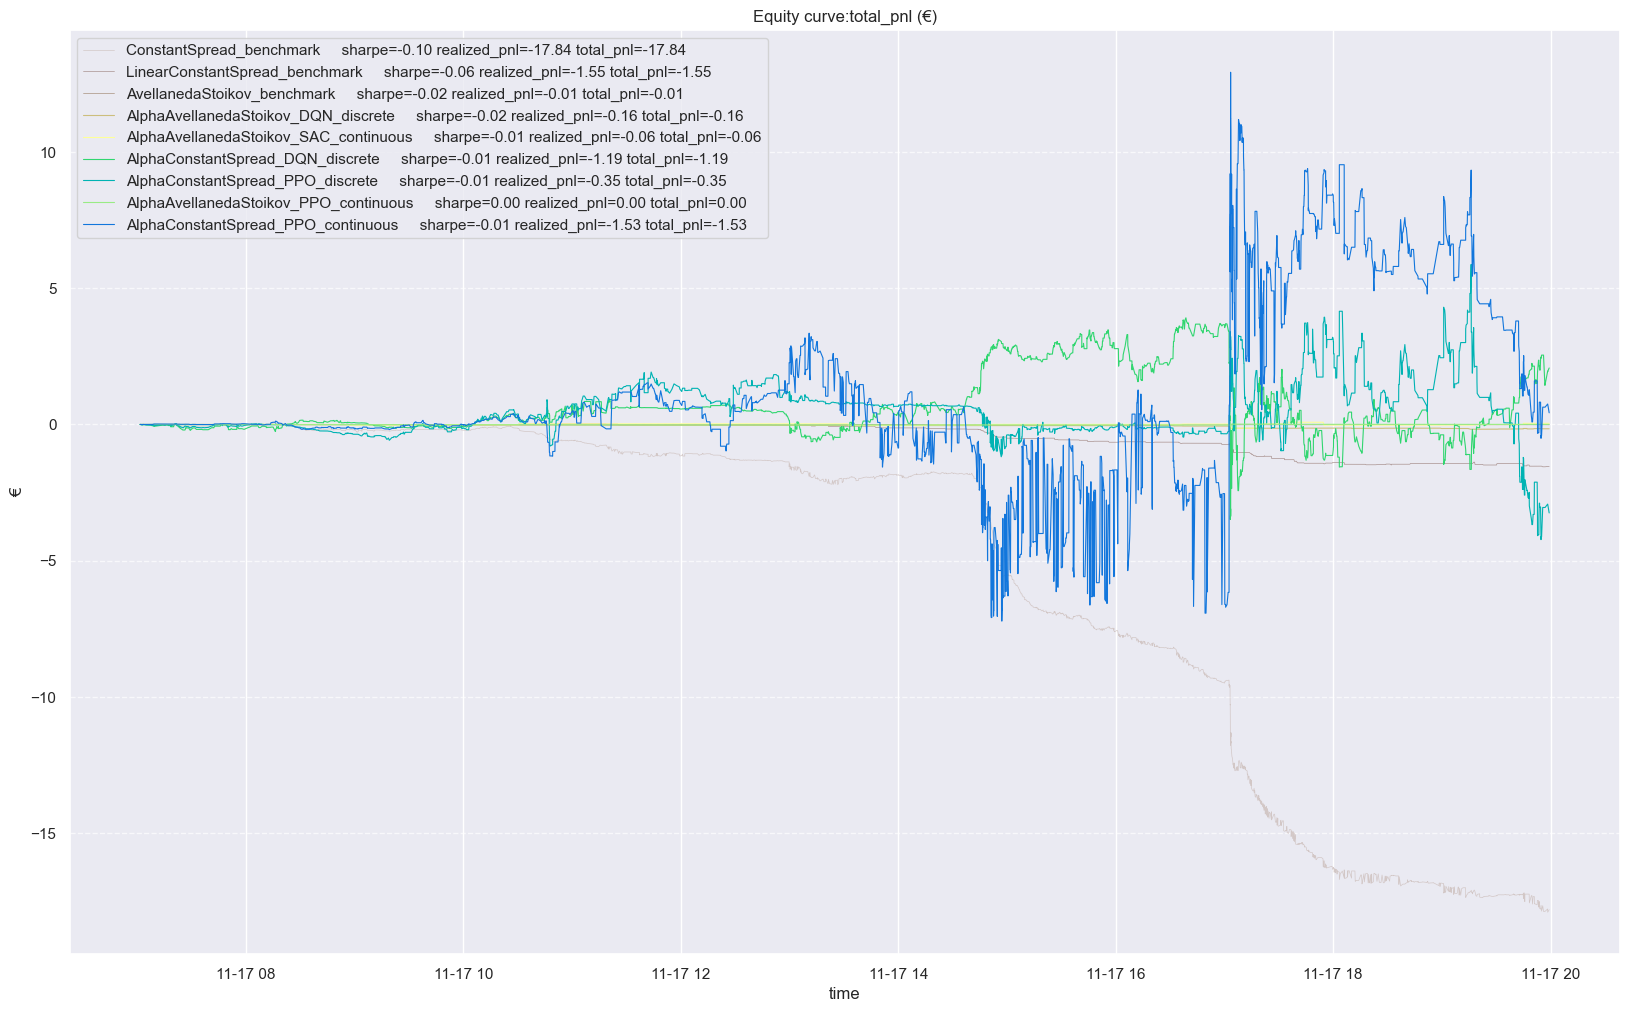

 36%|███████████████████████████▊                                                  | 5/14 [1:07:51<2:07:47, 851.96s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

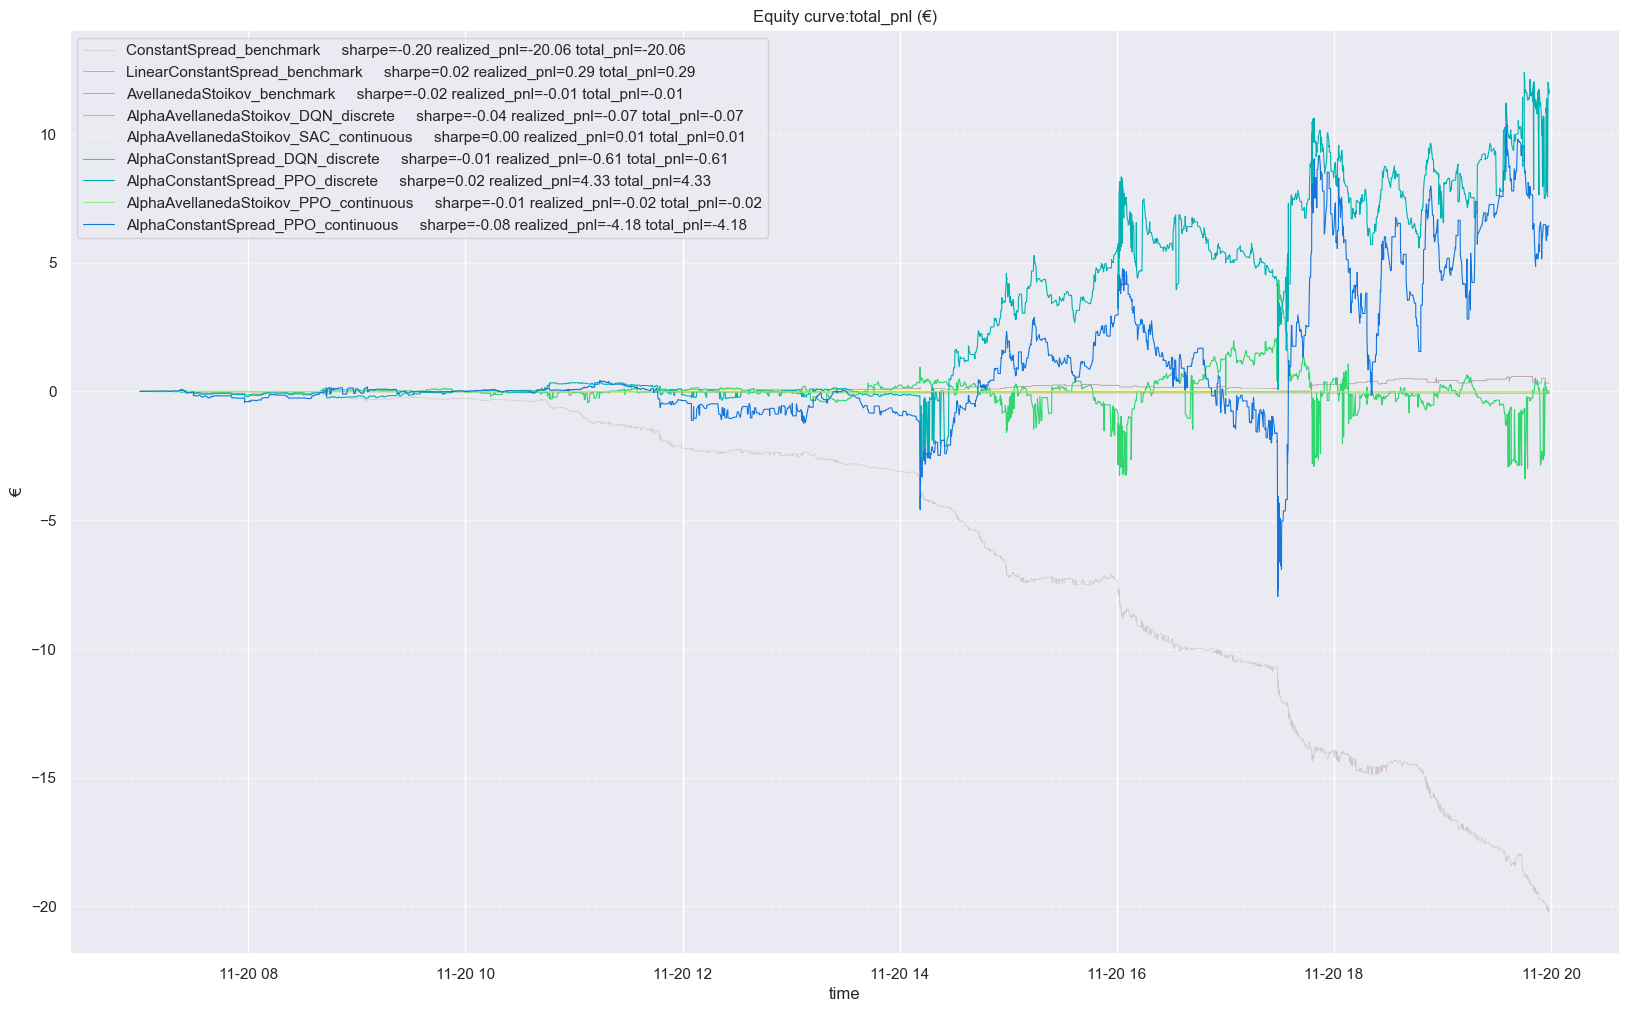

 43%|█████████████████████████████████▍                                            | 6/14 [1:21:20<1:51:39, 837.39s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

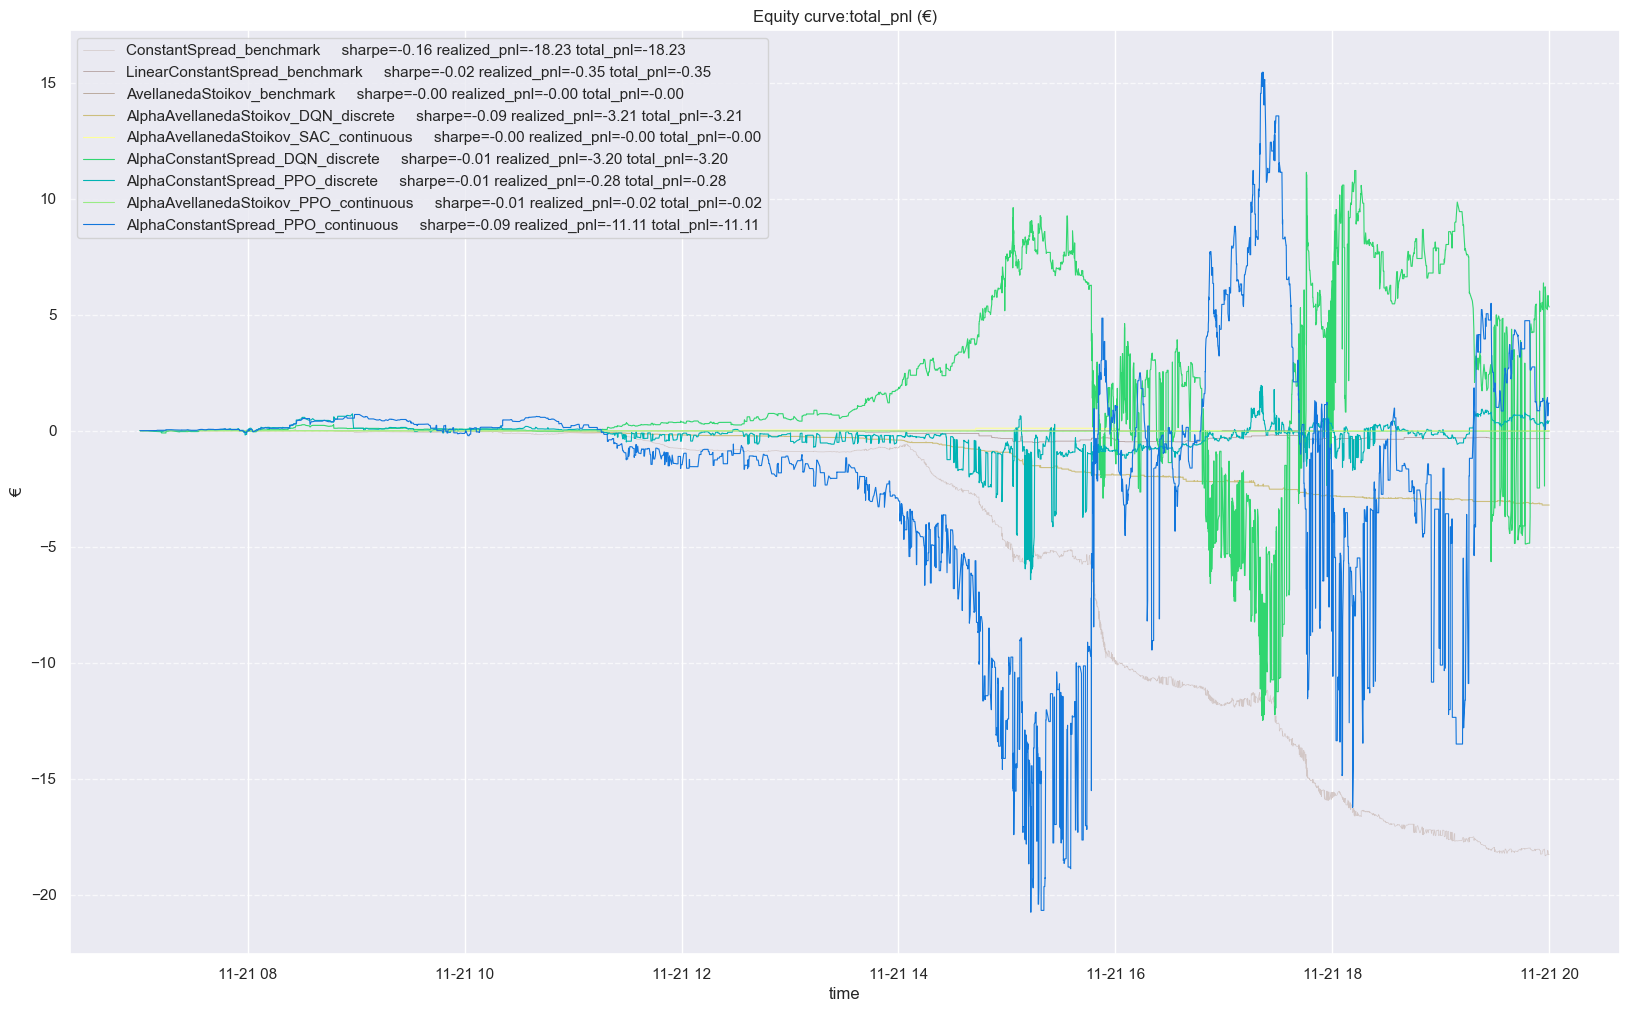

 50%|███████████████████████████████████████                                       | 7/14 [1:35:20<1:37:47, 838.28s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
market_making_backt

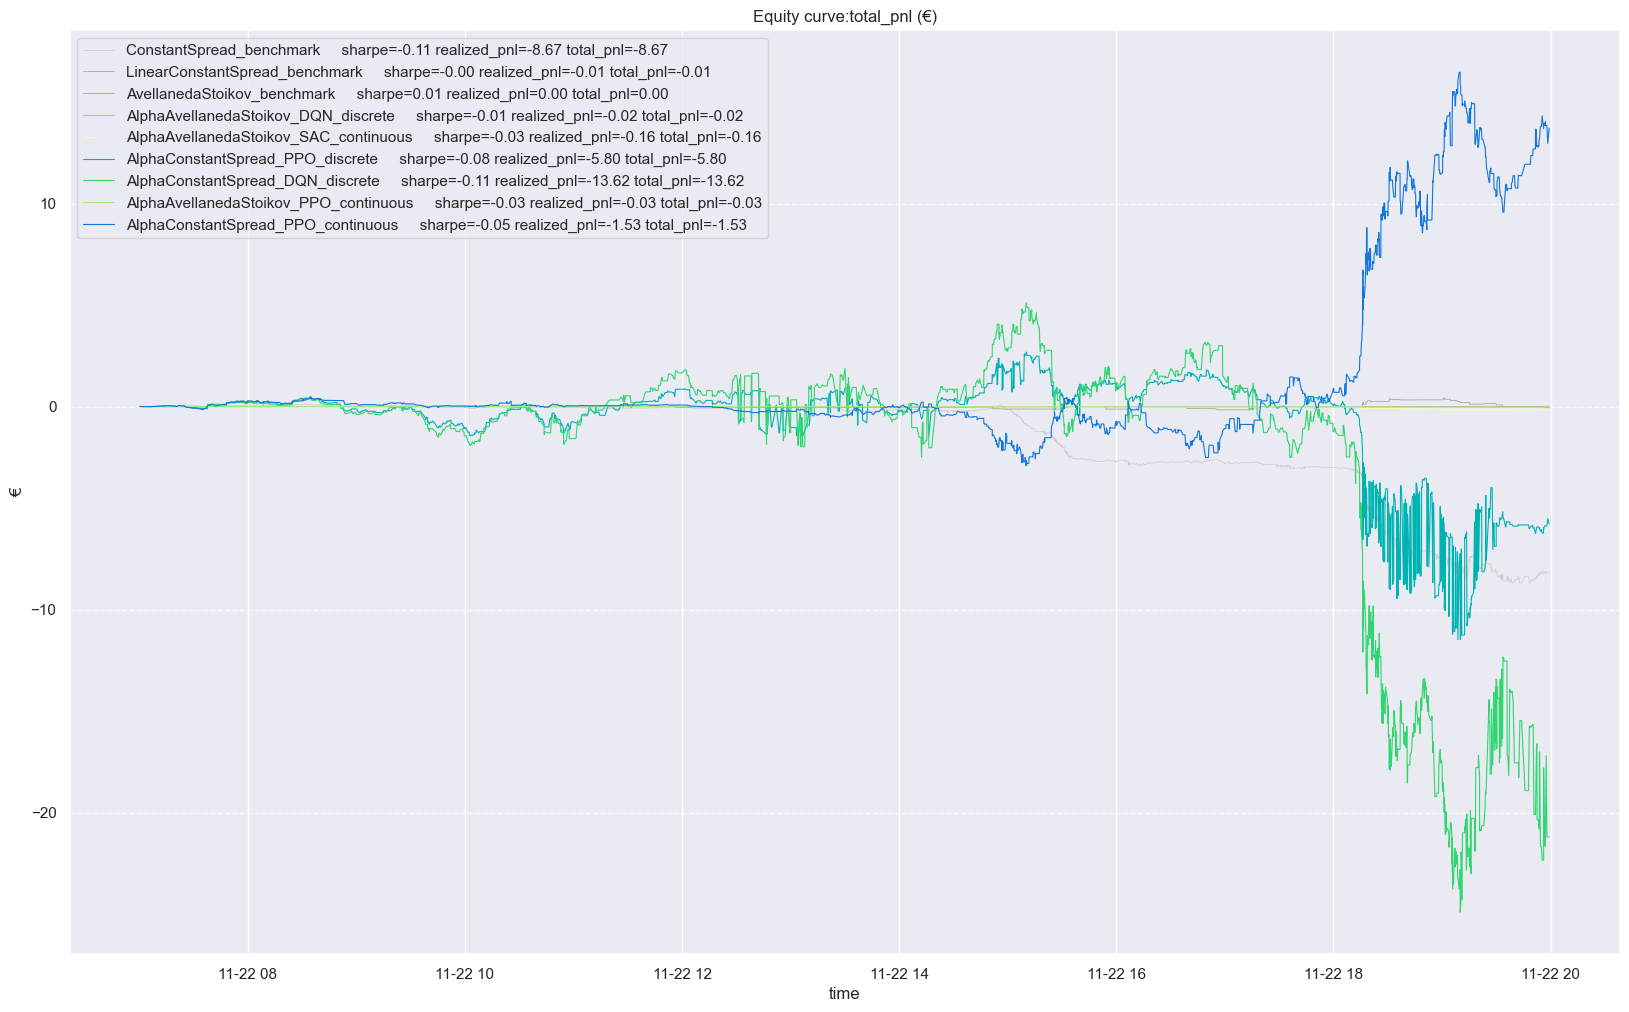

 57%|████████████████████████████████████████████▌                                 | 8/14 [1:47:27<1:20:17, 802.86s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...

Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

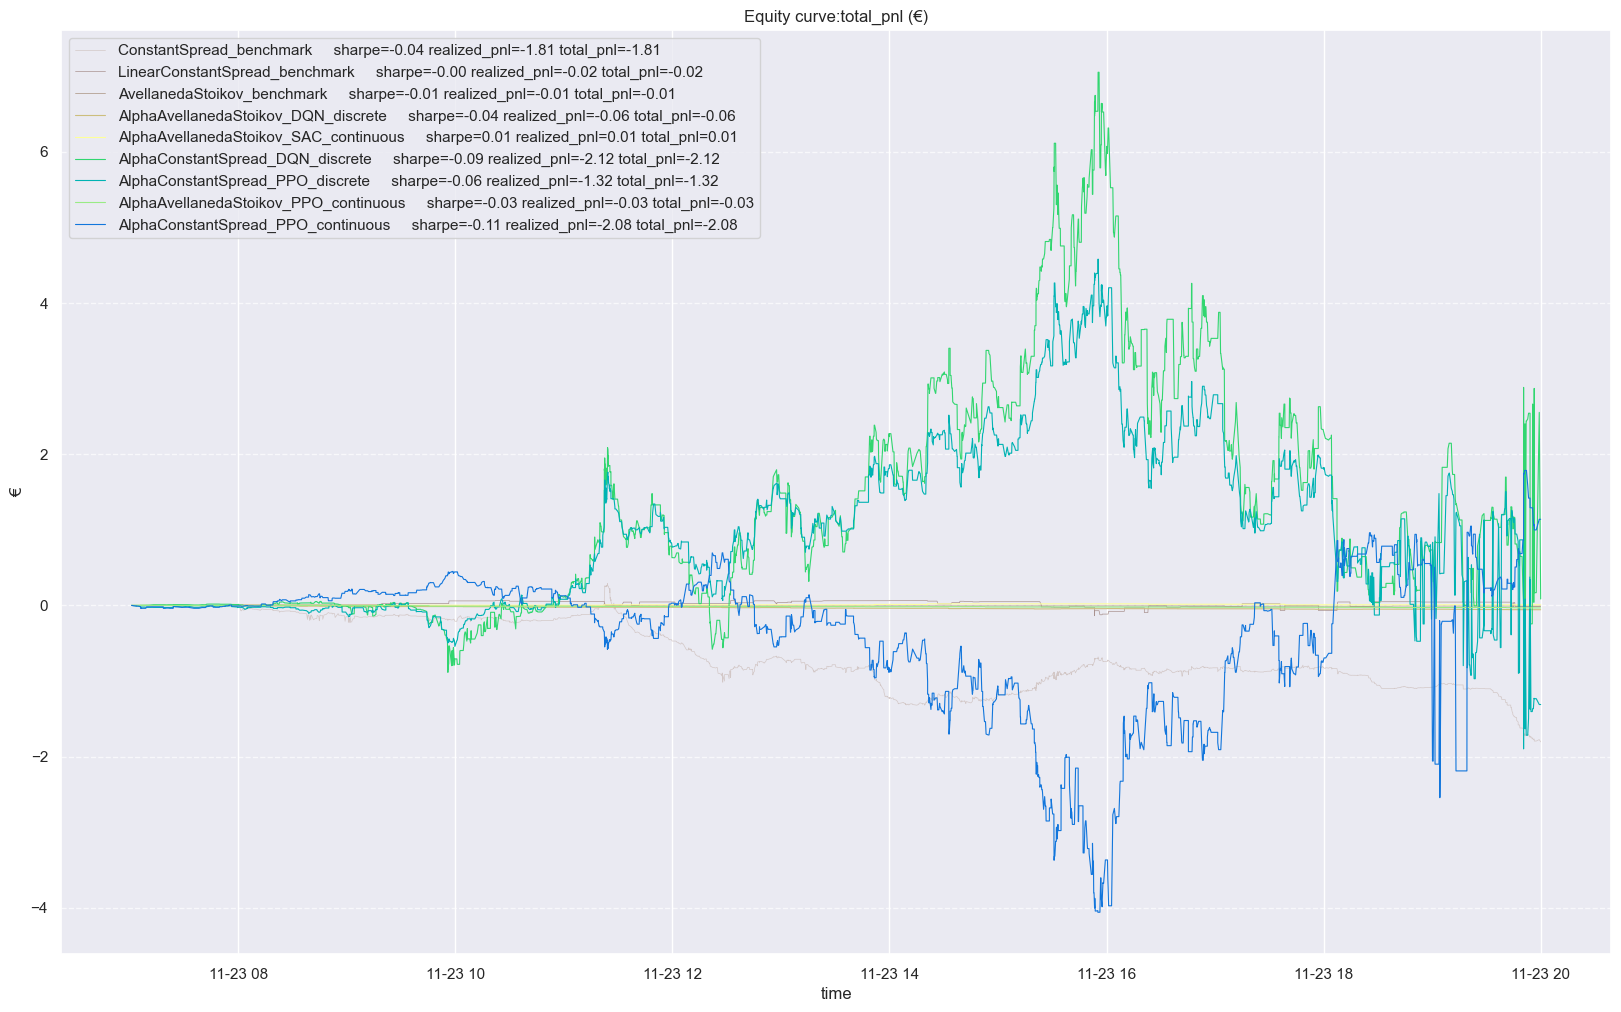

 64%|██████████████████████████████████████████████████▏                           | 9/14 [1:57:42<1:02:00, 744.10s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

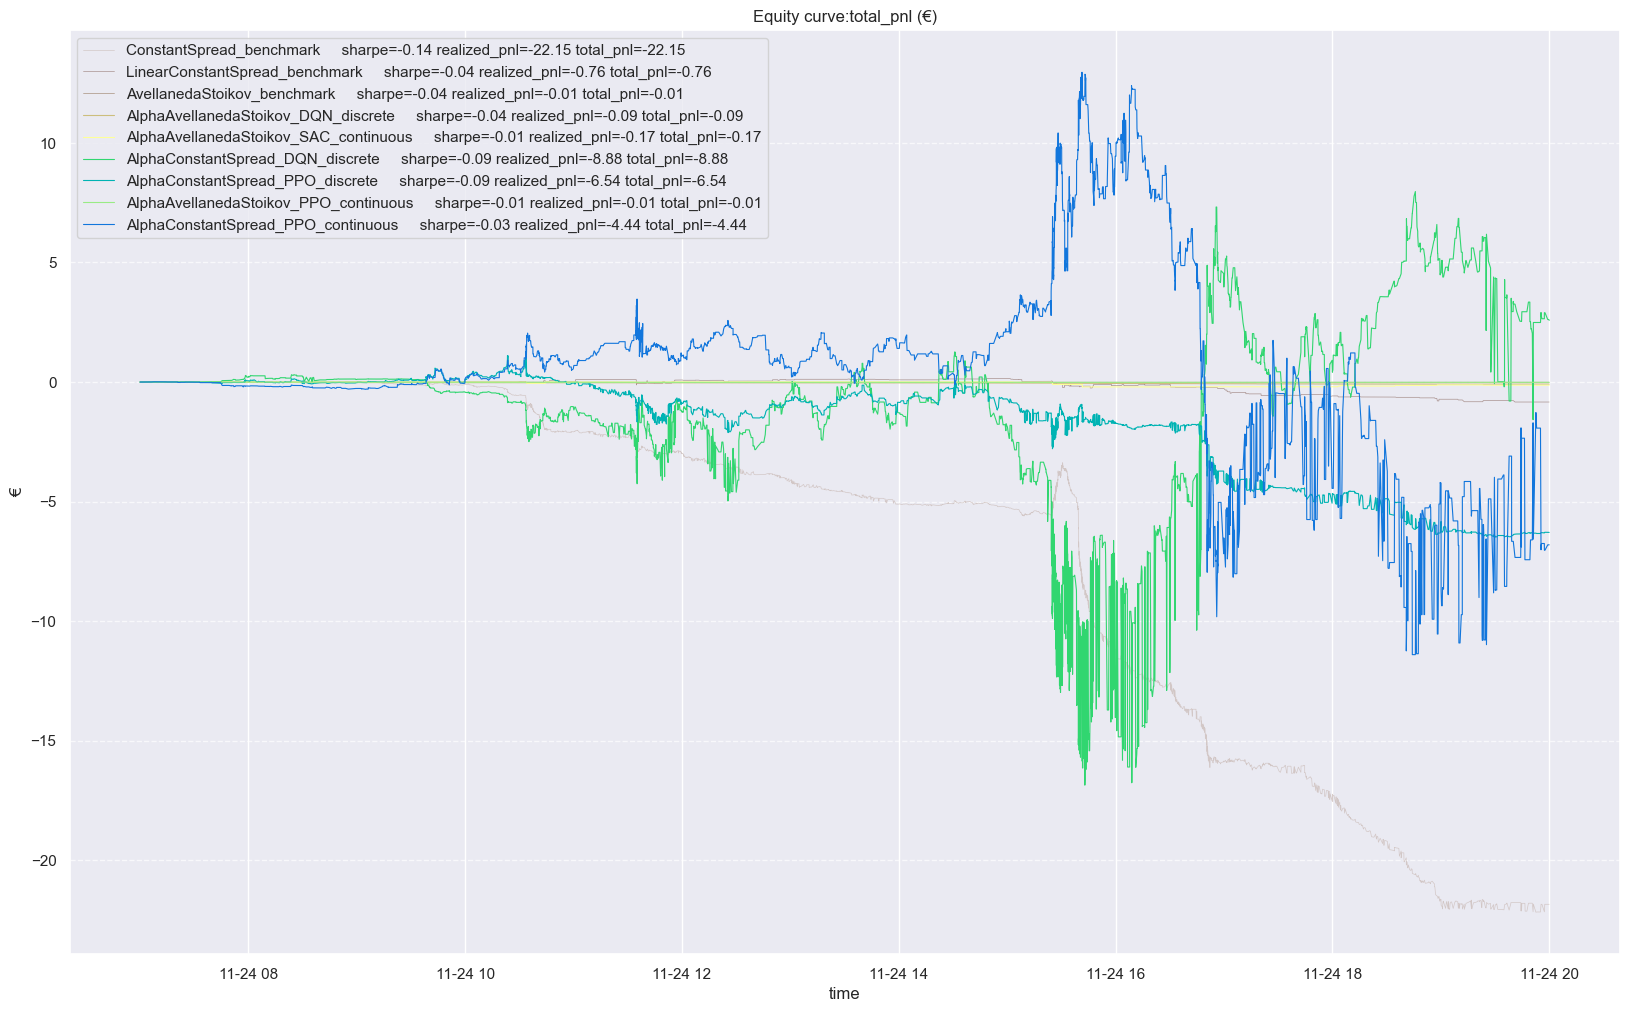

 71%|████████████████████████████████████████████████████████▍                      | 10/14 [2:09:38<49:01, 735.34s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
market_making_backt

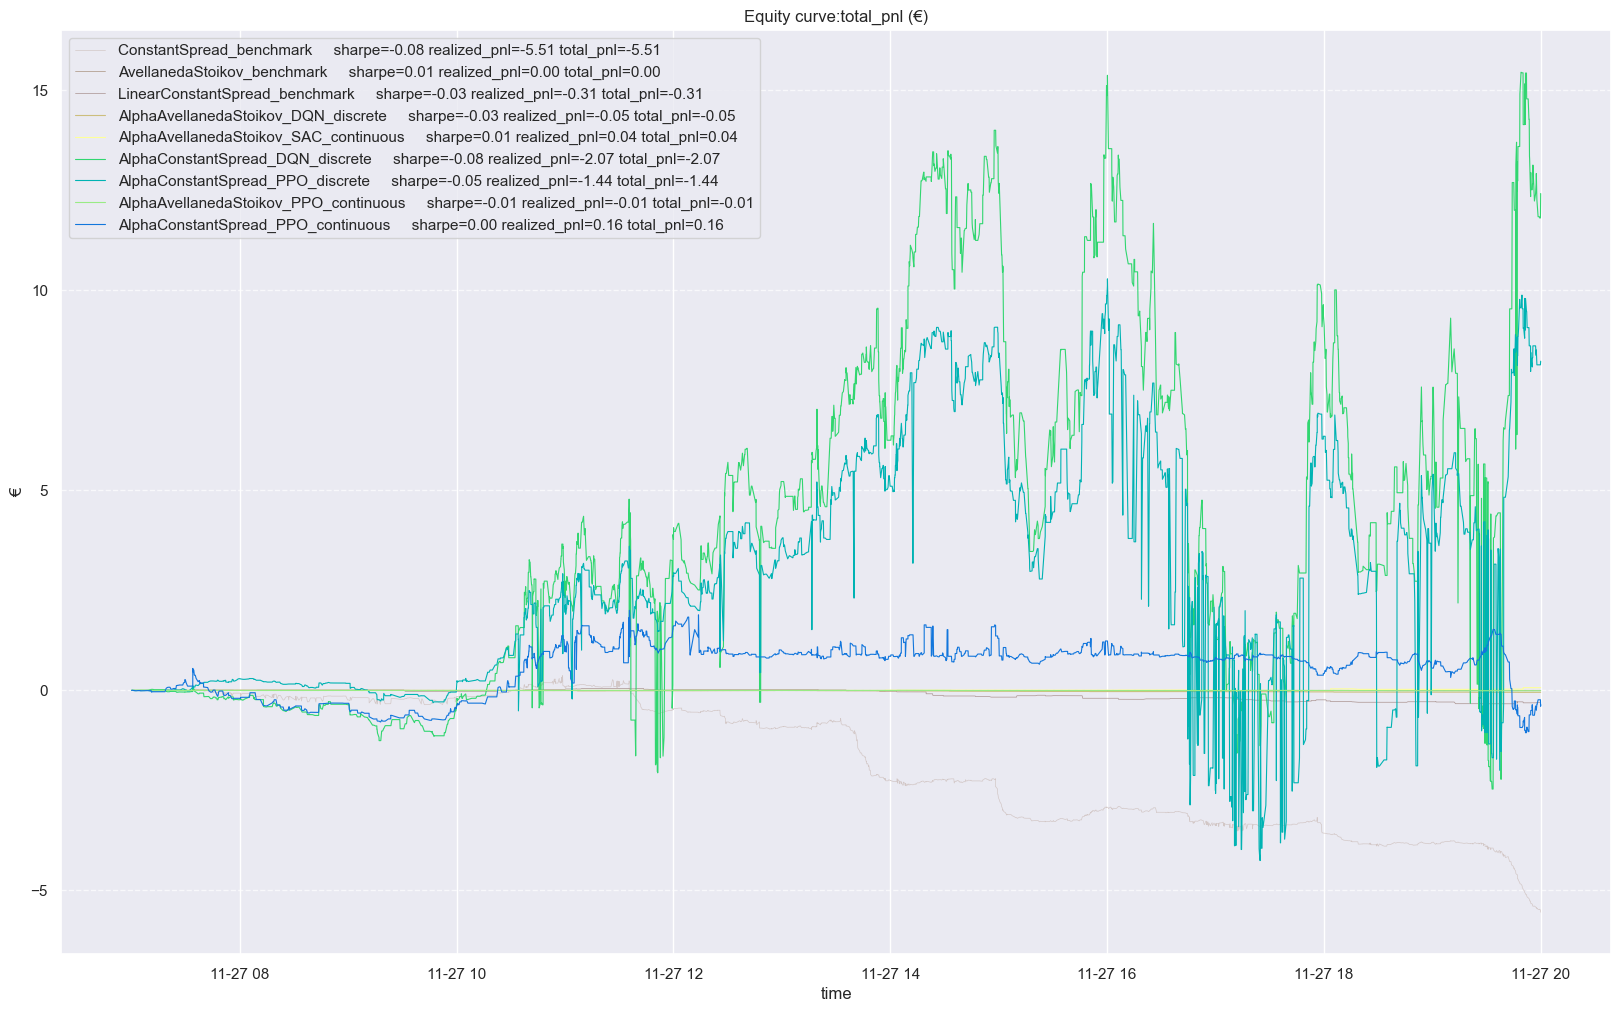

 79%|██████████████████████████████████████████████████████████████                 | 11/14 [2:21:25<36:19, 726.66s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
market_making_backt

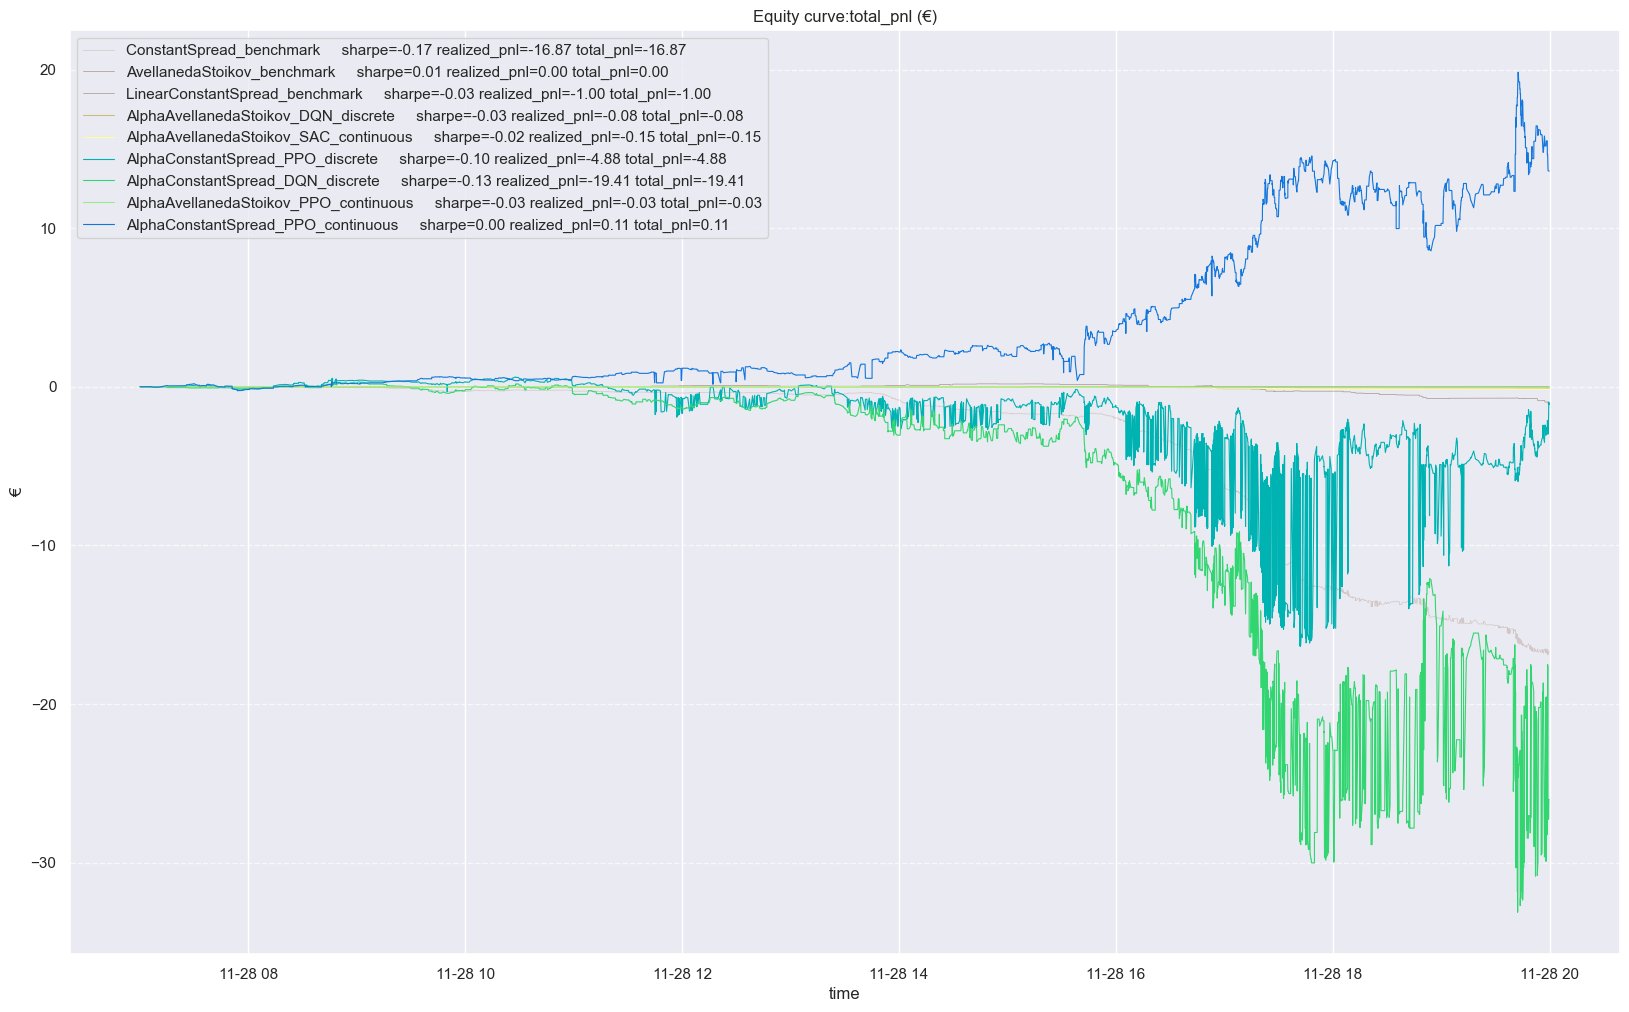

 86%|███████████████████████████████████████████████████████████████████▋           | 12/14 [2:32:35<23:39, 709.63s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
market_making_backt

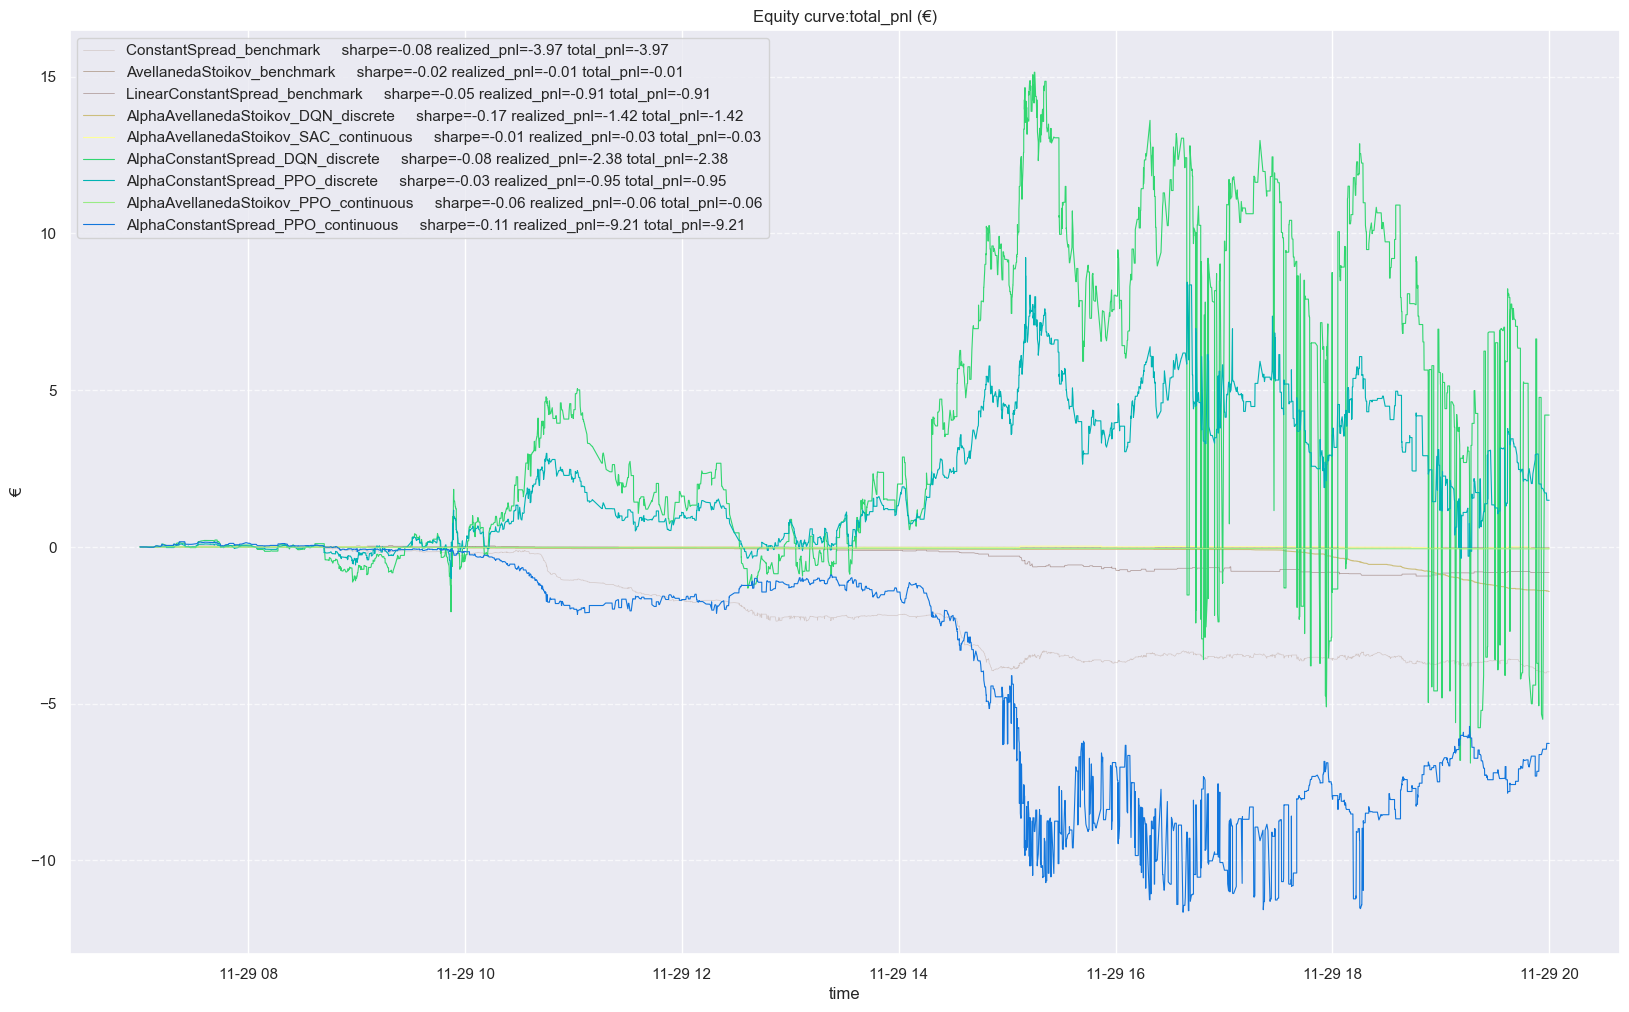

 93%|█████████████████████████████████████████████████████████████████████████▎     | 13/14 [2:43:48<11:38, 698.35s/it]

base_model DQN detected as not parallelized -> force simultaneous_algos = 1 (DummyVecEnv)
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize training: False model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl...
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks\Crypto
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_DQN_discrete/agent_model.zip ...
Loading normalize model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/normalizer_model.pkl ...
Loading existing model from X:\output_models/AlphaAvellanedaStoikov_SAC_continuous/agent_model.zip ...
market_making_backt

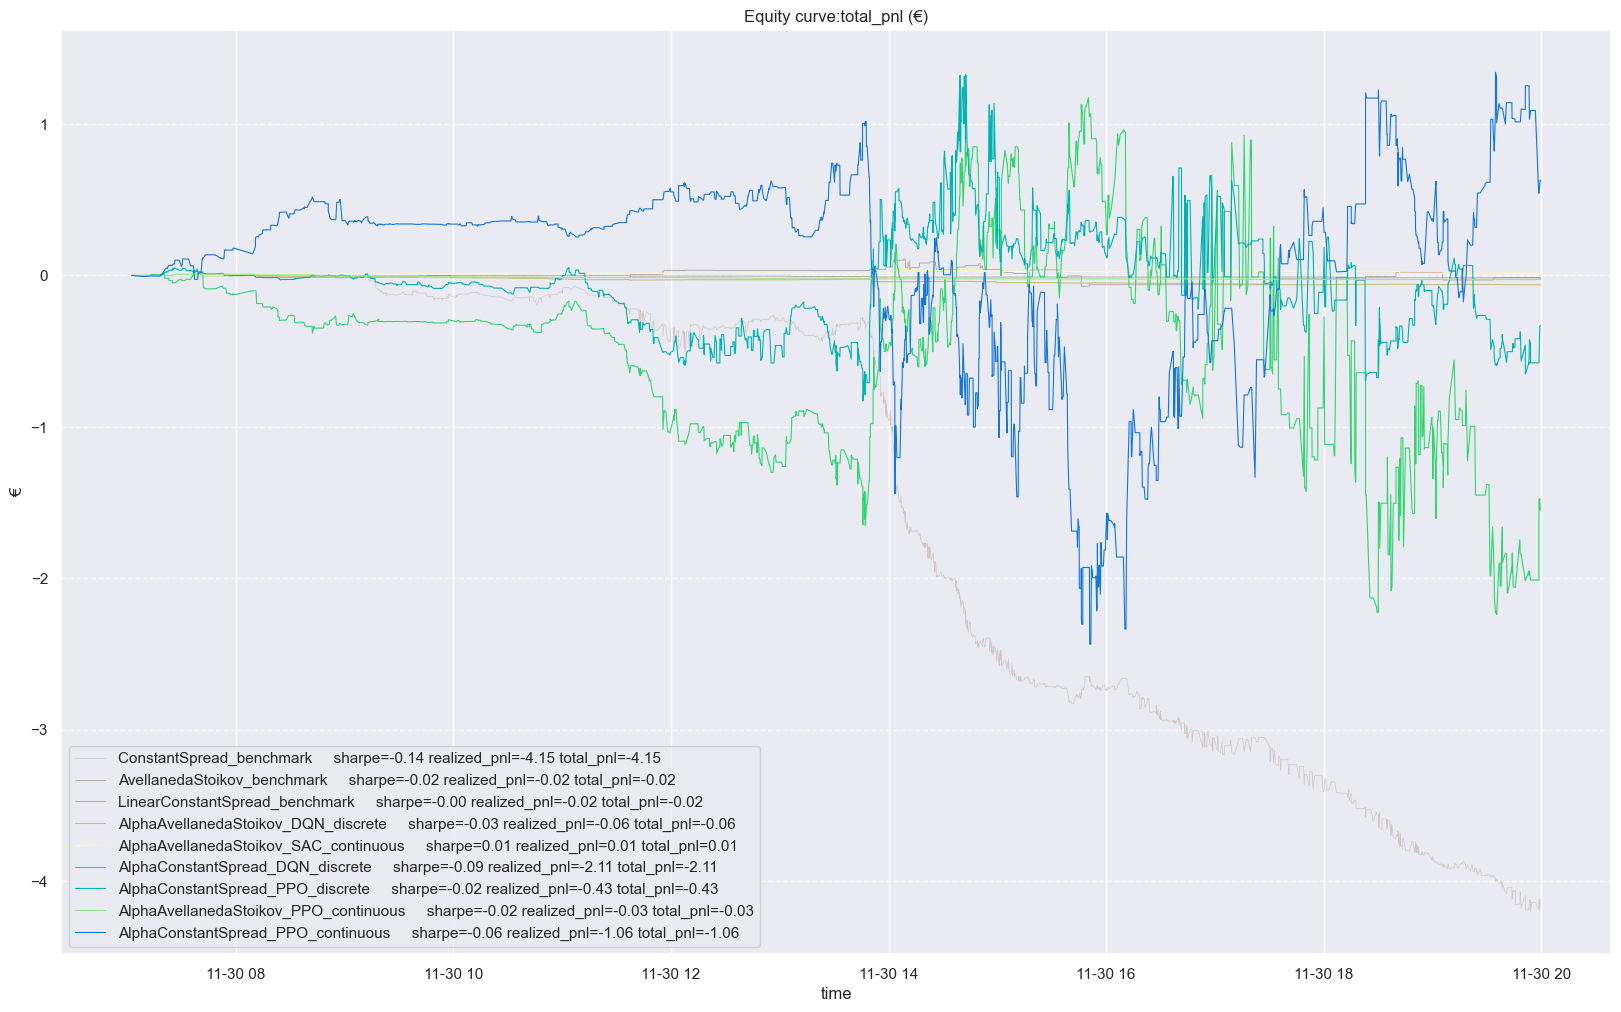

100%|███████████████████████████████████████████████████████████████████████████████| 14/14 [2:53:54<00:00, 745.31s/it]

test of 14 days 9 algorithms finished in 173.91 minutes


In [23]:
if TESTING:
    max_simultaneous = 5
    start=time.time()

    days_backtest_temp = days_backtest
    if DEBUG:
        print("DEBUG")
        max_simultaneous = 1
        days_backtest_temp=days_backtest[:3]
    print(rf"testing {len(days_backtest_temp)} days")


    equity_column_score=ScoreEnum.total_pnl

    compare_trading_statistically = CompareStatisticallyTradingAlgorithms()


    for test_day in tqdm.tqdm(days_backtest_temp):
        compare_trading = CompareTradingAlgorithms.get_instance(algorithms_list=algorithms_list,
                                                                 instrument_pk=instrument_pk,
                                                                 start_date=test_day+ datetime.timedelta(hours=int(FIRST_HOUR-2)),
                                                                 end_date=test_day+ datetime.timedelta(hours=int(LAST_HOUR+2)),
                                                                 benchmark_algorithms=algorithms_benchmark,
                                                                 
                                                                max_simultaneous = max_simultaneous
                                                               )
        compare_trading_results = compare_trading.get_results(equity_column_score_enum=equity_column_score)
        compare_trading_statistically.add_results_compare(compare_trading_results)
        df,fig = compare_trading.plot_equity_curve(plot_equity_column_score_enum=equity_column_score)
        

    elapsed=time.time()-start
    print('test of %d days %d algorithms finished in %.2f minutes'%(len(days_backtest_temp),len(algorithms_list),elapsed/60))

    compare_trading_statistically.save(NAME)

In [24]:
days_backtest_temp

[datetime.datetime(2023, 11, 13, 0, 0),
 datetime.datetime(2023, 11, 14, 0, 0),
 datetime.datetime(2023, 11, 15, 0, 0),
 datetime.datetime(2023, 11, 16, 0, 0),
 datetime.datetime(2023, 11, 17, 0, 0),
 datetime.datetime(2023, 11, 20, 0, 0),
 datetime.datetime(2023, 11, 21, 0, 0),
 datetime.datetime(2023, 11, 22, 0, 0),
 datetime.datetime(2023, 11, 23, 0, 0),
 datetime.datetime(2023, 11, 24, 0, 0),
 datetime.datetime(2023, 11, 27, 0, 0),
 datetime.datetime(2023, 11, 28, 0, 0),
 datetime.datetime(2023, 11, 29, 0, 0),
 datetime.datetime(2023, 11, 30, 0, 0)]

## Results  <a class="anchor" id="results"></a>

In [25]:
compare_trading_statistically = CompareStatisticallyTradingAlgorithms.load(NAME)
# compare_trading_statistically.results_compare_dict

### Ratios <a class="anchor" id="ratios"></a>

In [26]:
ratios = [ScoreEnum.sharpe,ScoreEnum.sortino,ScoreEnum.max_dd,ScoreEnum.pnl_to_map]

# algorithm_info_color={}
# for benchmark_algo in algorithms_benchmark: 
#     algorithm_info_color[benchmark_algo.algorithm_info] = 'red'

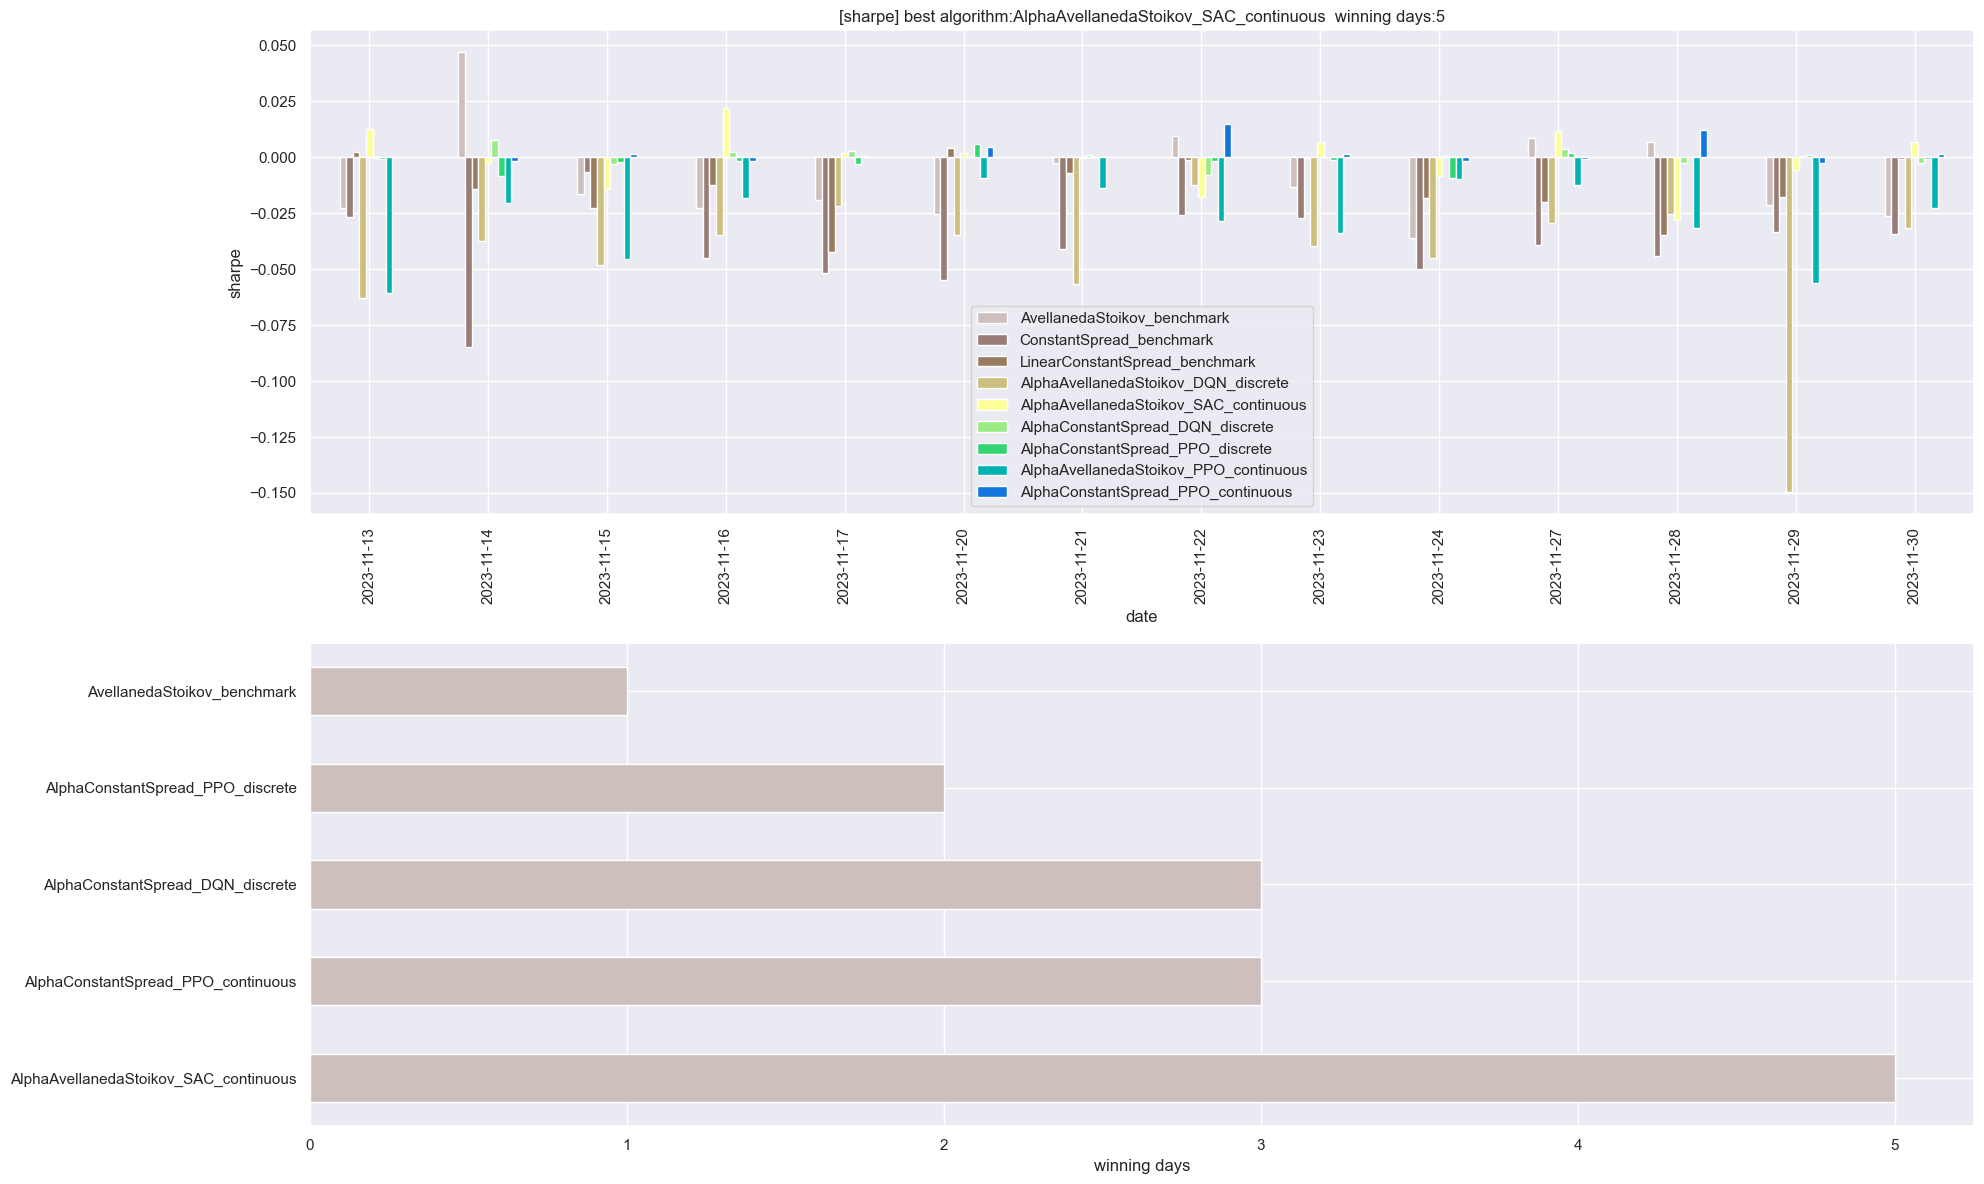

---------
sharpe score kruskal_wallis 
H(9)_sharpe = 73.28  p_value=7.78e-14

sharpe score mann_whitney vs ConstantSpread_benchmark 
AvellanedaStoikov_benchmark              U = 181.0  p_value=1.07e-05 r=-1.09 
LinearConstantSpread_benchmark           U = 175.0  p_value=3.14e-05 r=-1.19 
AlphaAvellanedaStoikov_DQN_discrete       U = 101.0  p_value=6.49e-02 r=0.12 
AlphaAvellanedaStoikov_SAC_continuous    U = 189.0  p_value=2.29e-06 r=-1.76 
AlphaConstantSpread_DQN_discrete         U = 195.0  p_value=6.61e-07 r=-2.20 
AlphaConstantSpread_PPO_discrete         U = 194.0  p_value=8.17e-07 r=-2.12 
AlphaAvellanedaStoikov_PPO_continuous    U = 140.0  p_value=4.04e-03 r=-0.57 
AlphaConstantSpread_PPO_continuous       U = 196.0  p_value=5.33e-07 r=-2.26 

sharpe score mann_whitney vs LinearConstantSpread_benchmark 
AvellanedaStoikov_benchmark               U = 94.0  p_value=6.23e-02 r=-0.14 
ConstantSpread_benchmark                   U = 21.0  p_value=3.14e-05 r=1.19 
AlphaAvellanedaStoikov_DQ

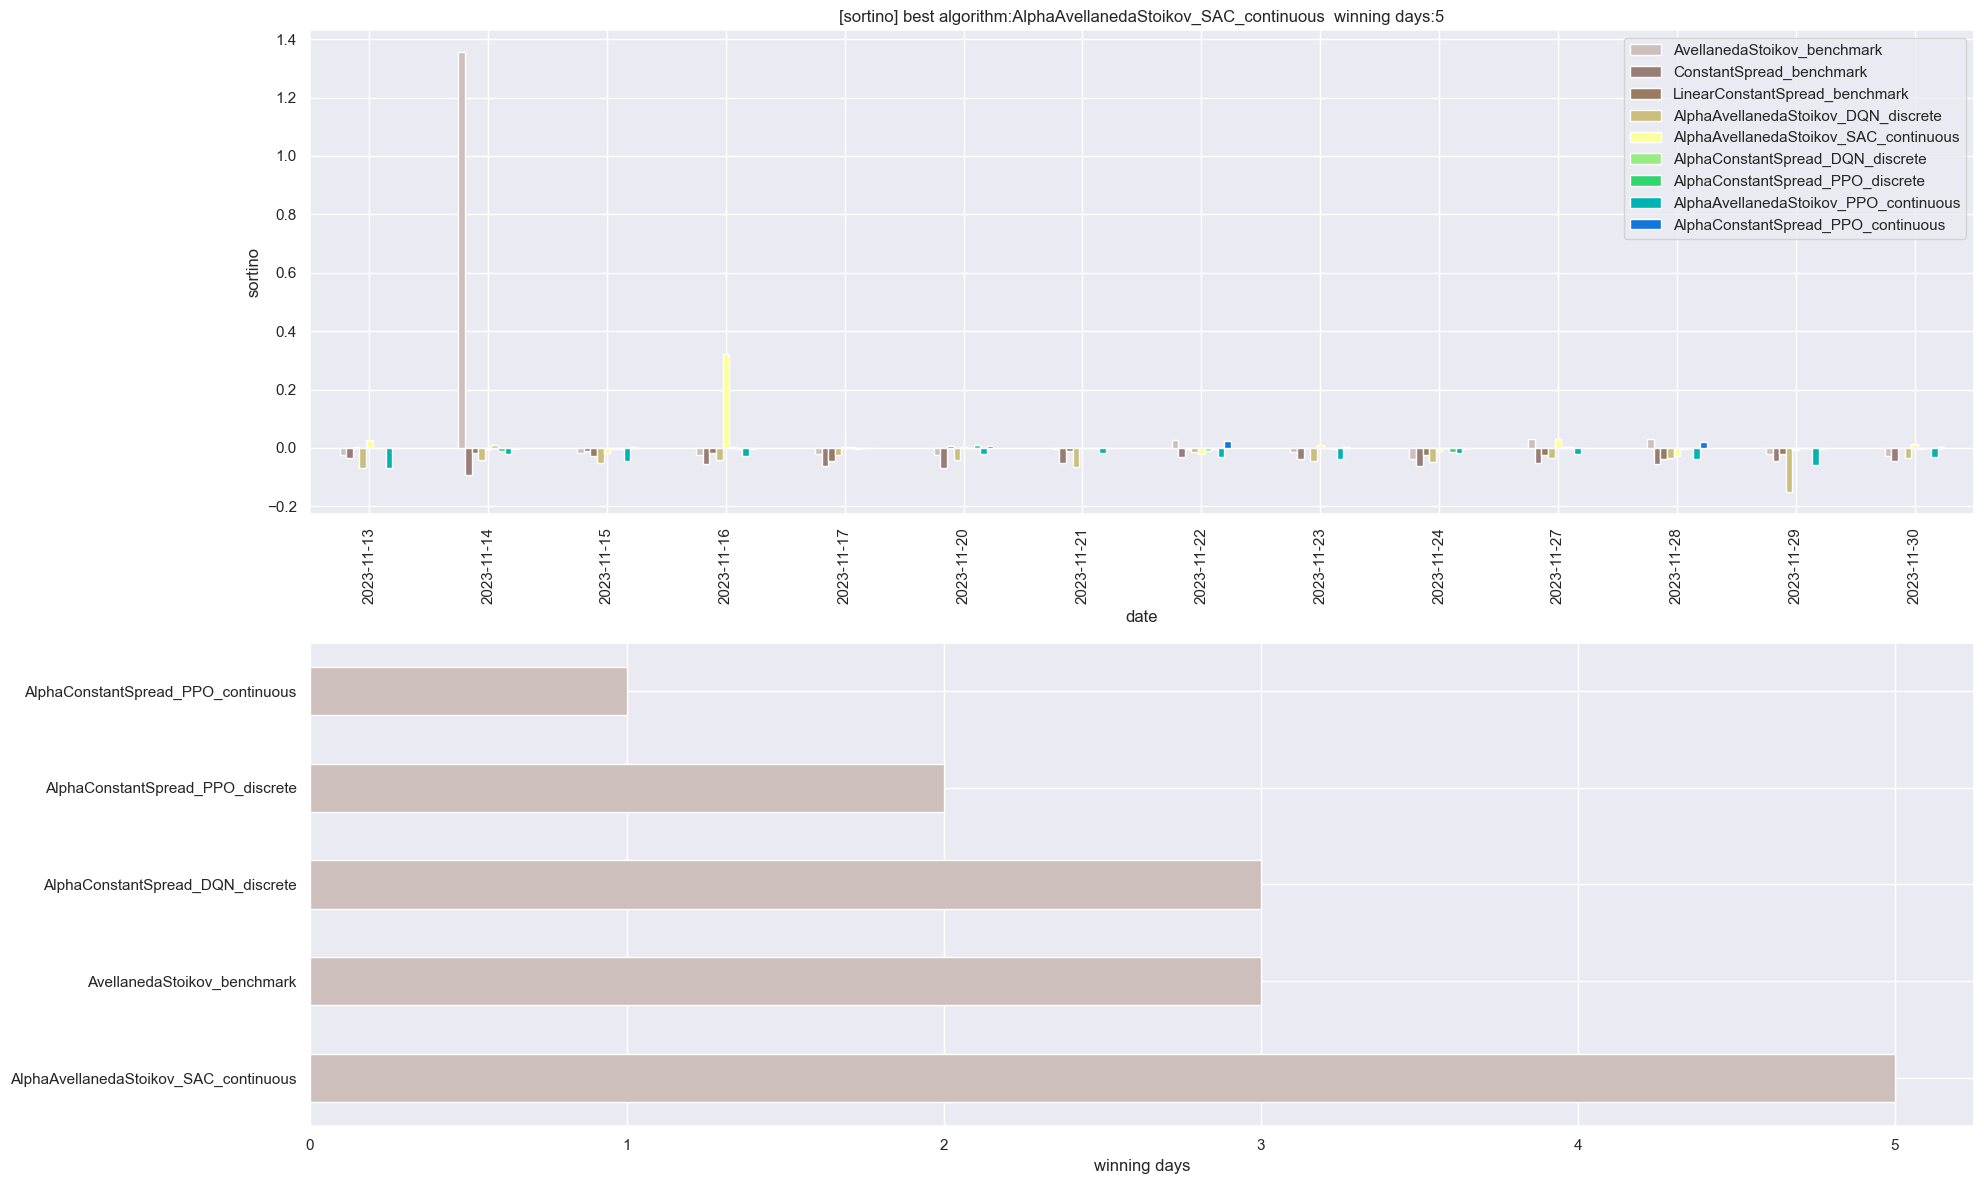

---------
sortino score kruskal_wallis 
H(9)_sortino = 75.52  p_value=2.78e-14

sortino score mann_whitney vs ConstantSpread_benchmark 
AvellanedaStoikov_benchmark              U = 185.0  p_value=5.04e-06 r=-0.38 
LinearConstantSpread_benchmark           U = 179.0  p_value=1.55e-05 r=-1.38 
AlphaAvellanedaStoikov_DQN_discrete      U = 117.0  p_value=2.82e-02 r=-0.01 
AlphaAvellanedaStoikov_SAC_continuous    U = 192.0  p_value=1.24e-06 r=-0.81 
AlphaConstantSpread_DQN_discrete         U = 195.0  p_value=6.61e-07 r=-2.48 
AlphaConstantSpread_PPO_discrete         U = 194.0  p_value=8.17e-07 r=-2.38 
AlphaAvellanedaStoikov_PPO_continuous    U = 151.0  p_value=1.13e-03 r=-0.72 
AlphaConstantSpread_PPO_continuous       U = 196.0  p_value=5.33e-07 r=-2.51 

sortino score mann_whitney vs LinearConstantSpread_benchmark 
AvellanedaStoikov_benchmark              U = 105.0  p_value=5.47e-02 r=-0.28 
ConstantSpread_benchmark                   U = 17.0  p_value=1.55e-05 r=1.38 
AlphaAvellanedaStoiko

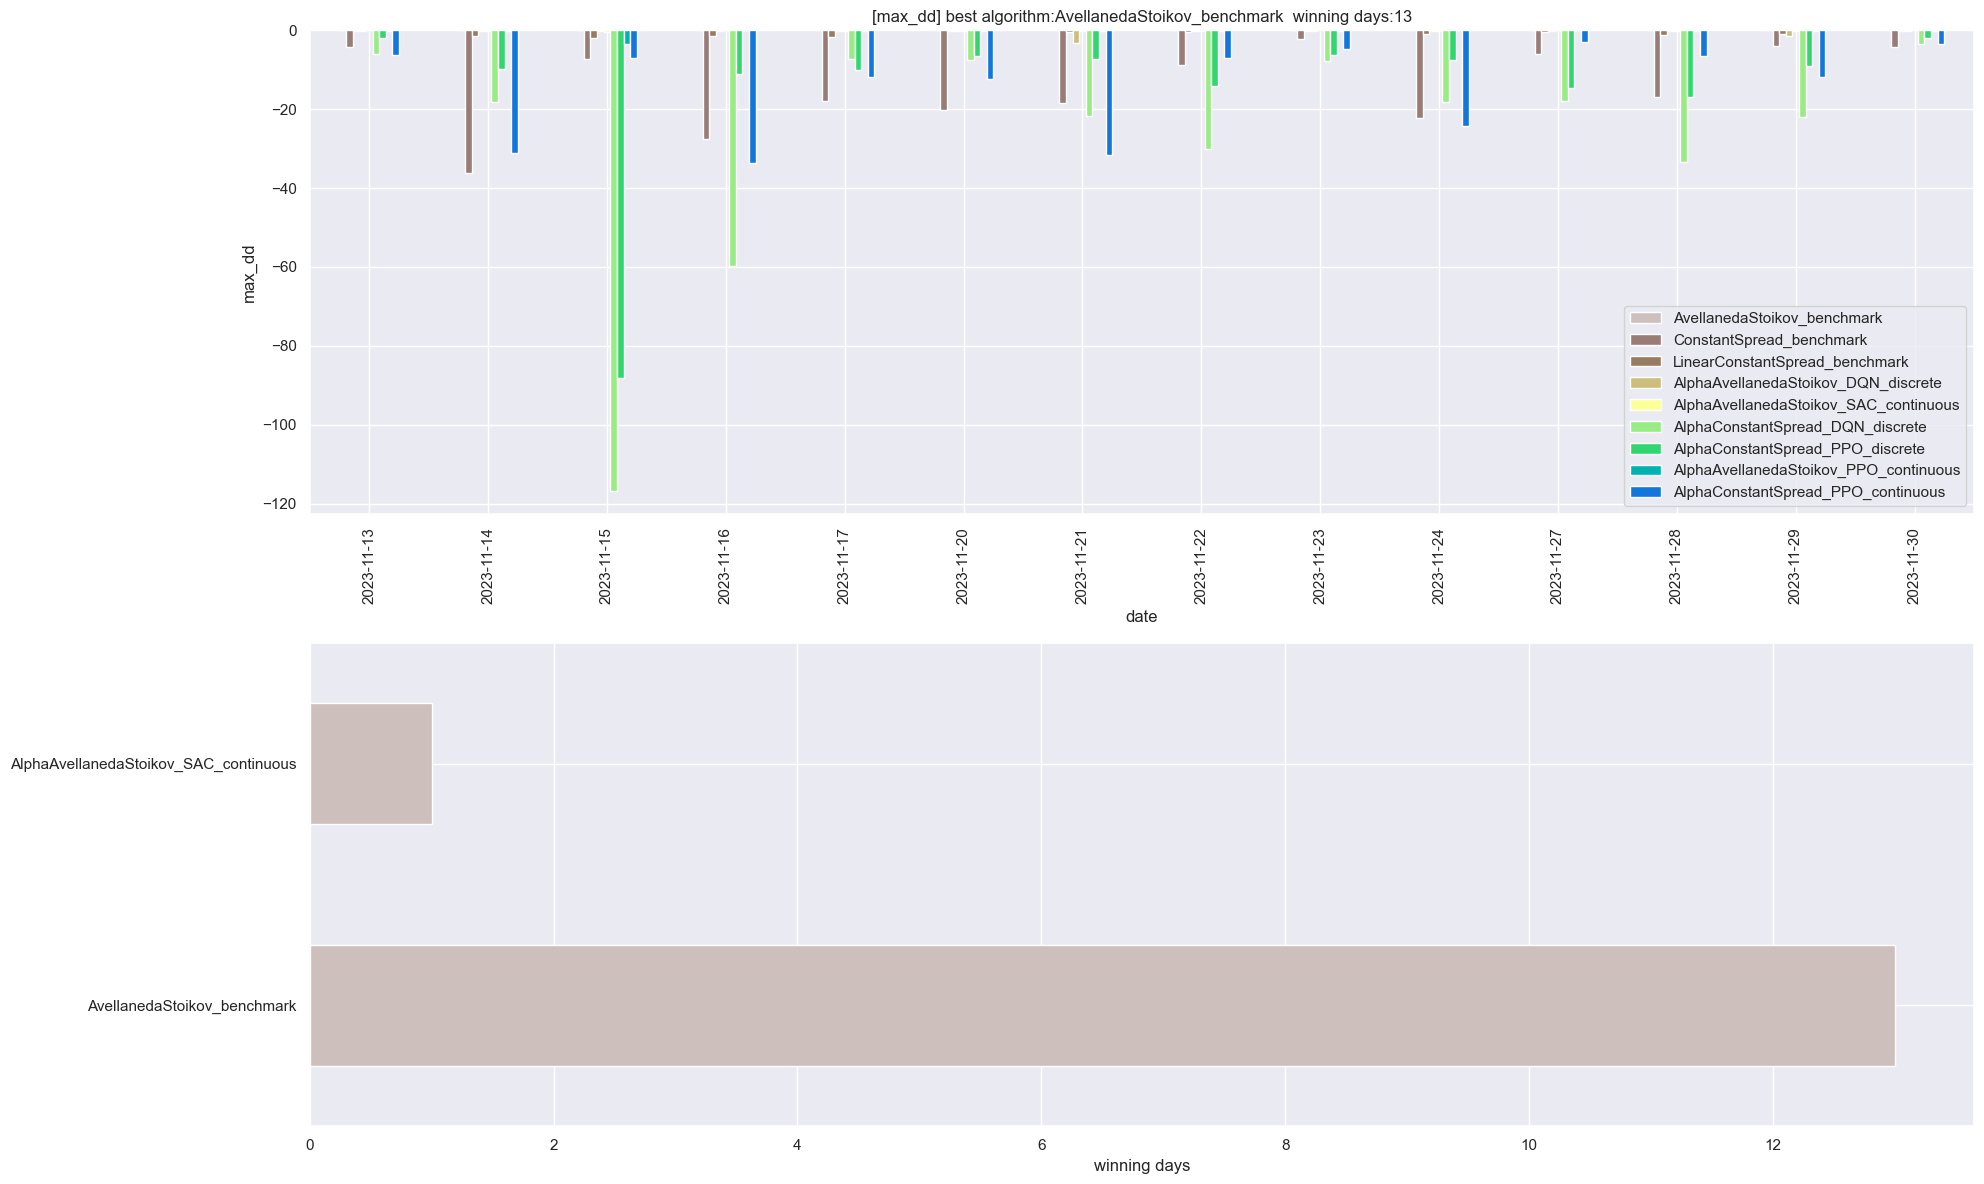

---------
max_dd score kruskal_wallis 
H(9)_max_dd = 107.03  p_value=1.11e-20

max_dd score mann_whitney vs ConstantSpread_benchmark 
AvellanedaStoikov_benchmark              U = 196.0  p_value=5.33e-07 r=-1.36 
LinearConstantSpread_benchmark           U = 196.0  p_value=5.33e-07 r=-1.27 
AlphaAvellanedaStoikov_DQN_discrete      U = 195.0  p_value=6.61e-07 r=-1.31 
AlphaAvellanedaStoikov_SAC_continuous    U = 196.0  p_value=5.33e-07 r=-1.34 
AlphaConstantSpread_DQN_discrete           U = 71.0  p_value=1.60e-02 r=0.39 
AlphaConstantSpread_PPO_discrete          U = 111.0  p_value=4.04e-02 r=0.03 
AlphaAvellanedaStoikov_PPO_continuous    U = 195.0  p_value=6.61e-07 r=-1.32 
AlphaConstantSpread_PPO_continuous        U = 98.0  p_value=7.14e-02 r=-0.01 

max_dd score mann_whitney vs LinearConstantSpread_benchmark 
AvellanedaStoikov_benchmark              U = 196.0  p_value=5.33e-07 r=-1.37 
ConstantSpread_benchmark                    U = 0.0  p_value=5.33e-07 r=1.27 
AlphaAvellanedaStoikov_D

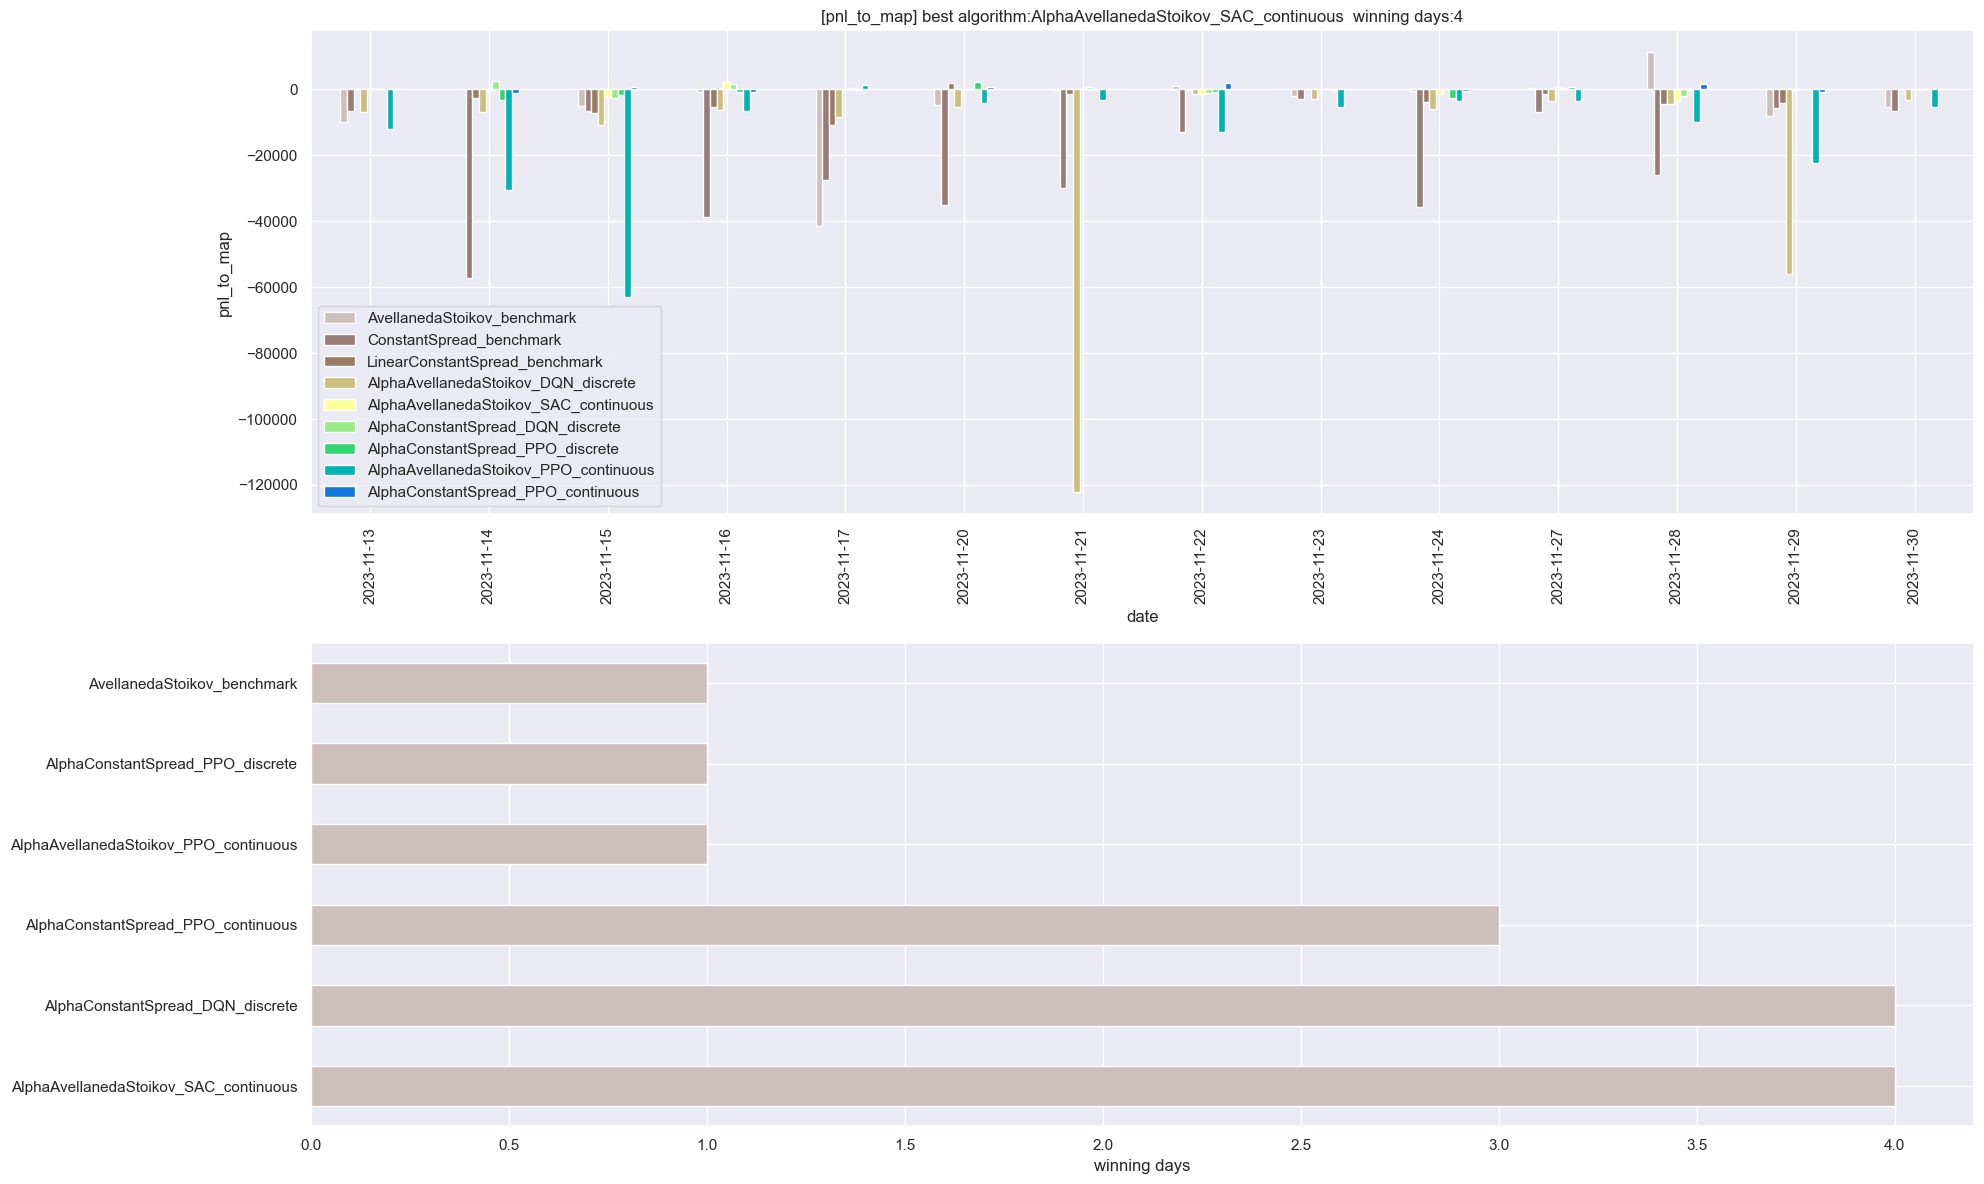

---------
pnl_to_map score kruskal_wallis 
H(9)_pnl_to_map = 69.66  p_value=4.09e-13

pnl_to_map score mann_whitney vs ConstantSpread_benchmark 
AvellanedaStoikov_benchmark              U = 168.0  p_value=1.00e-04 r=-0.82 
LinearConstantSpread_benchmark           U = 180.0  p_value=1.29e-05 r=-1.08 
AlphaAvellanedaStoikov_DQN_discrete      U = 138.0  p_value=4.97e-03 r=-0.10 
AlphaAvellanedaStoikov_SAC_continuous    U = 195.0  p_value=6.61e-07 r=-1.25 
AlphaConstantSpread_DQN_discrete         U = 196.0  p_value=5.33e-07 r=-1.27 
AlphaConstantSpread_PPO_discrete         U = 195.0  p_value=6.61e-07 r=-1.24 
AlphaAvellanedaStoikov_PPO_continuous    U = 138.0  p_value=4.97e-03 r=-0.35 
AlphaConstantSpread_PPO_continuous       U = 196.0  p_value=5.33e-07 r=-1.28 

pnl_to_map score mann_whitney vs LinearConstantSpread_benchmark 
AvellanedaStoikov_benchmark                U = 97.0  p_value=7.01e-02 r=0.15 
ConstantSpread_benchmark                   U = 16.0  p_value=1.29e-05 r=1.08 
AlphaAvel

In [27]:
ratios_dict={}
ratios_fig={}
algorithm_info_color=None
for ratio in ratios:
    ratios_dict[ratio] = compare_trading_statistically.get_results_compare(score_enum=ratio)
    df_results , ratios_fig[ratio] = compare_trading_statistically.plot_results_compare(score_enum=ratio,algorithm_info_color=algorithm_info_color)
    print("---------")
    print(rf"{ratio} score kruskal_wallis ")
    compare_trading_statistically.get_kruskal_wallis(ratio)
    print("")
    for benchmark_algo in algorithms_benchmark: 
        print(rf"{ratio} score mann_whitney vs {benchmark_algo.algorithm_info} ")
        output_series = compare_trading_statistically.get_mann_whitney(ratio,benchmark_algo.algorithm_info)
        print(output_series.to_string())
        print("")

## Email  <a class="anchor" id="email"></a>

In [28]:
files_append = []
output_path = rf"{LAMBDA_TEMP_PATH}/notebooks/{NAME}"
if not os.path.exists(output_path):
    os.mkdir(path=output_path)
    
def save_ratios_fig():
    print(rf"save_ratios_fig in {output_path}")
    for ratio in ratios_fig.keys():
        fig = ratios_fig[ratio]
        file_path = rf"{output_path}/ratio_{ratio}.png"
        fig.savefig(file_path)
        files_append.append(file_path)
save_ratios_fig()

save_ratios_fig in E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov


In [29]:
elapsed_notebook=time.time()-start_notebook
print(rf'Notebook DEBUG:{DEBUG} PARAMETER_TUNING:{PARAMETER_TUNING} TRAINING:{TRAINING} TESTING:{TESTING} %d days and %d algorithms in %.2f minutes'%(len(days_backtest),len(algorithms_list),elapsed_notebook/60))

today_str = datetime.datetime.today().strftime('%Y%m%d')
if not DEBUG:
    save_ratios_fig()    
    send_email(recipient='javifalces@gmail.com',subject=f'[{today_str}]{NAME} finished ',body='',file_append=files_append)

Notebook DEBUG:False PARAMETER_TUNING:False TRAINING:False TESTING:True 14 days and 9 algorithms in 174.07 minutes
save_ratios_fig in E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov
adding file E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov/ratio_sharpe.png
adding file E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov/ratio_sortino.png
adding file E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov/ratio_max_dd.png
adding file E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov/ratio_pnl_to_map.png
adding file E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov/ratio_sharpe.png
adding file E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov/ratio_sortino.png
adding file E:\javif\Coding\Python\market_making_fw\java\temp/notebooks/AlphaAvellanedaStoikov/ratio_max_